# COMP9417 - Group Project 
### Yining Liu z5466010
 <span style="color:lightgray; font-size:1.2em">1. Data preprocessing</span><br>
<span style="color:lightgray; font-size:1.2em">2. Classification</span><br>
<span style="color:lightgray; font-size:1.2em">3. Regression</span><br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

## 1. Data preprocessing

### 1.1 Load data

In [2]:
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
x_train_range = x_train.describe()
y_train_range = y_train.describe()

In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [4]:
x_train_range

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.021449,-0.000912,0.012368,0.045447,0.034961,0.070815,0.074531,0.049599,0.027968,0.055083,...,0.003136,-0.021765,-0.091785,0.080681,0.075869,0.021120,0.055394,0.013260,-0.045870,-0.096509
std,0.986789,1.008141,1.009709,0.985909,0.988168,0.990837,0.975877,1.014643,0.996102,1.034924,...,1.030756,0.993863,0.974188,0.969610,1.026368,1.002988,1.000607,0.990364,0.994845,0.992540
min,-8.163800,-11.982000,-3.502000,-4.704000,-7.017800,-4.991400,-5.802900,-3.559200,-6.818100,-13.353000,...,-4.359300,-6.069700,-5.830000,-4.047800,-3.770400,-4.435800,-3.708900,-8.598300,-5.669100,-5.210500
25%,-0.629273,-0.601035,-0.652678,-0.567387,-0.589565,-0.570862,-0.488445,-0.636760,-0.559490,-0.496065,...,-0.621422,-0.618745,-0.727640,-0.499472,-0.516375,-0.600855,-0.574335,-0.556127,-0.688122,-0.779593
50%,-0.026099,0.026874,-0.042700,0.069475,0.026490,0.071909,0.098494,0.014708,0.050312,0.143520,...,-0.004454,-0.001942,-0.123345,0.119180,0.052484,0.029948,0.027084,0.054325,-0.040731,-0.121505
75%,0.581712,0.627327,0.620073,0.677163,0.639463,0.704340,0.666788,0.691455,0.647860,0.745035,...,0.600202,0.609105,0.551413,0.698022,0.636352,0.658850,0.663262,0.644168,0.609800,0.558490
max,4.575000,4.232200,6.586800,3.867900,7.705200,5.112700,10.495000,4.853900,4.515200,2.694500,...,11.979000,4.113700,3.634700,4.362200,19.196000,4.660800,11.429000,3.945100,4.264900,4.185400


In [5]:
y_train_range

,label
count,10000.000000
mean,9.831900
std,6.752659
min,0.000000
25%,5.000000
50%,6.000000
75%,12.000000
max,27.000000


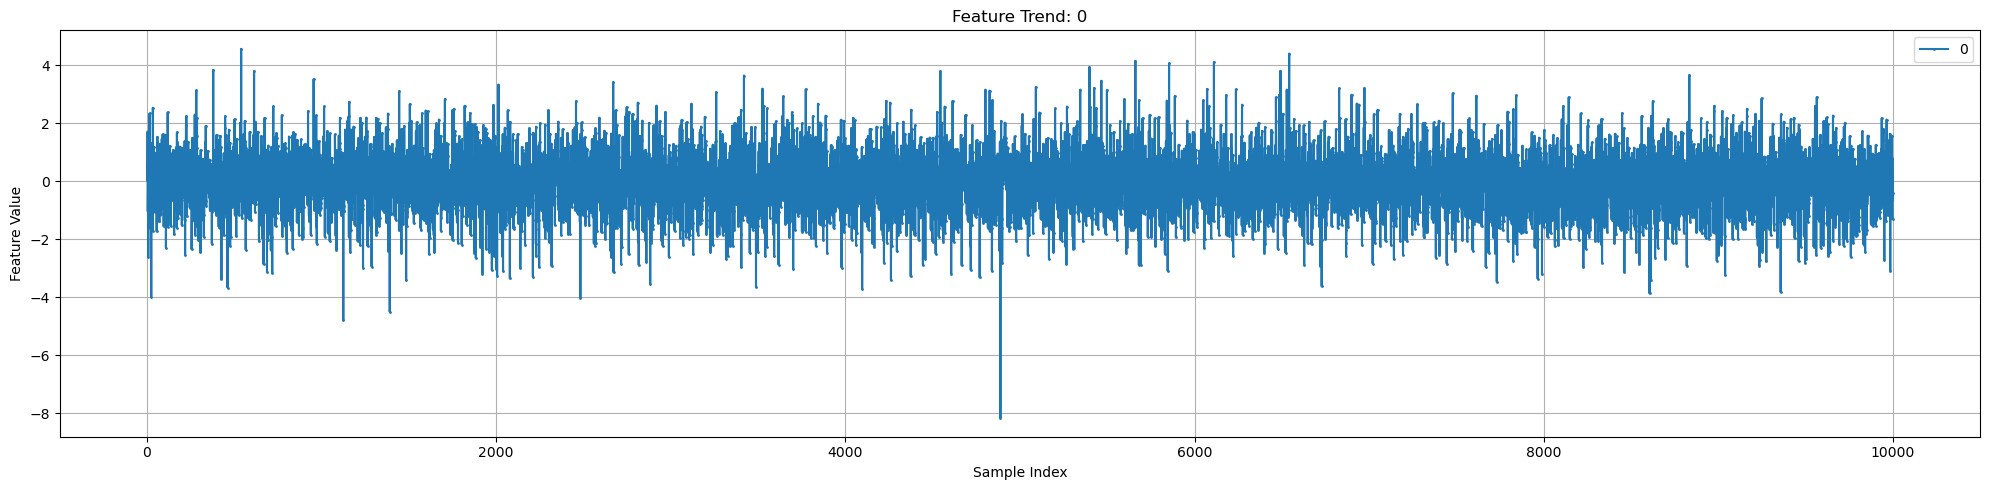

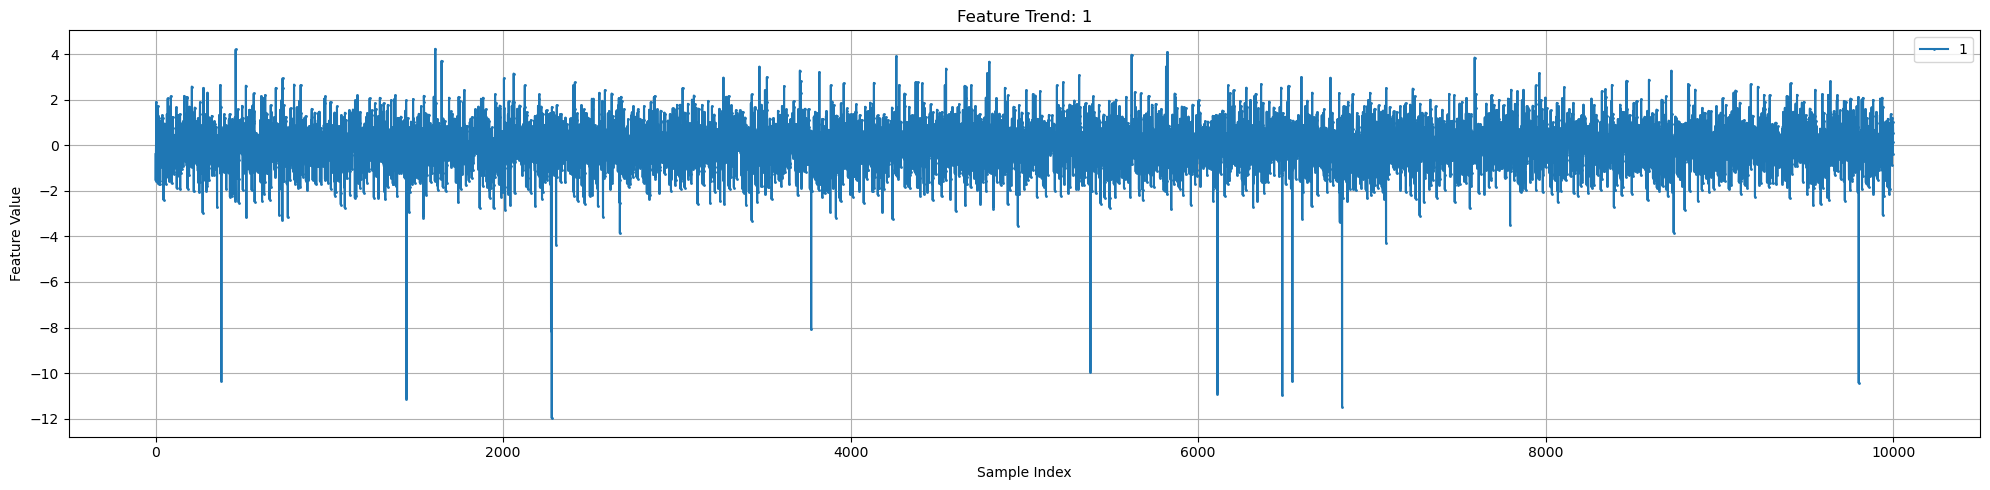

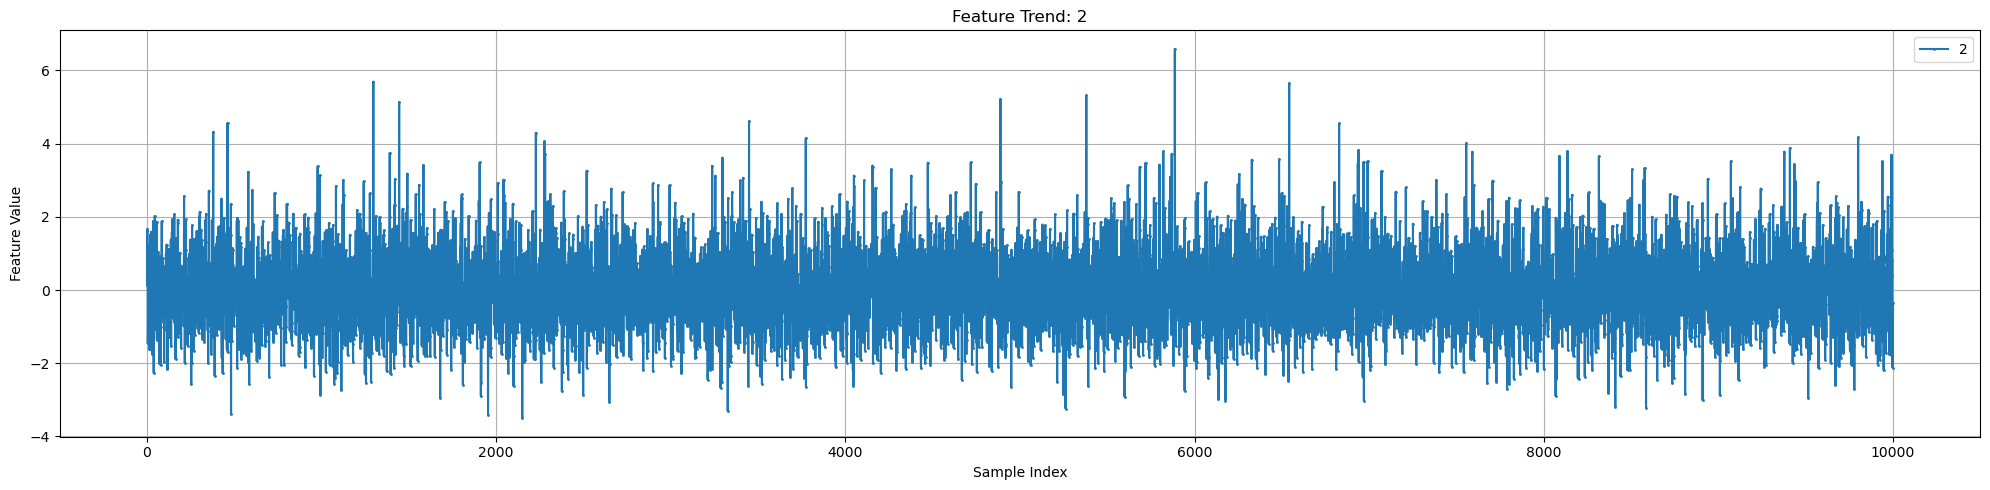

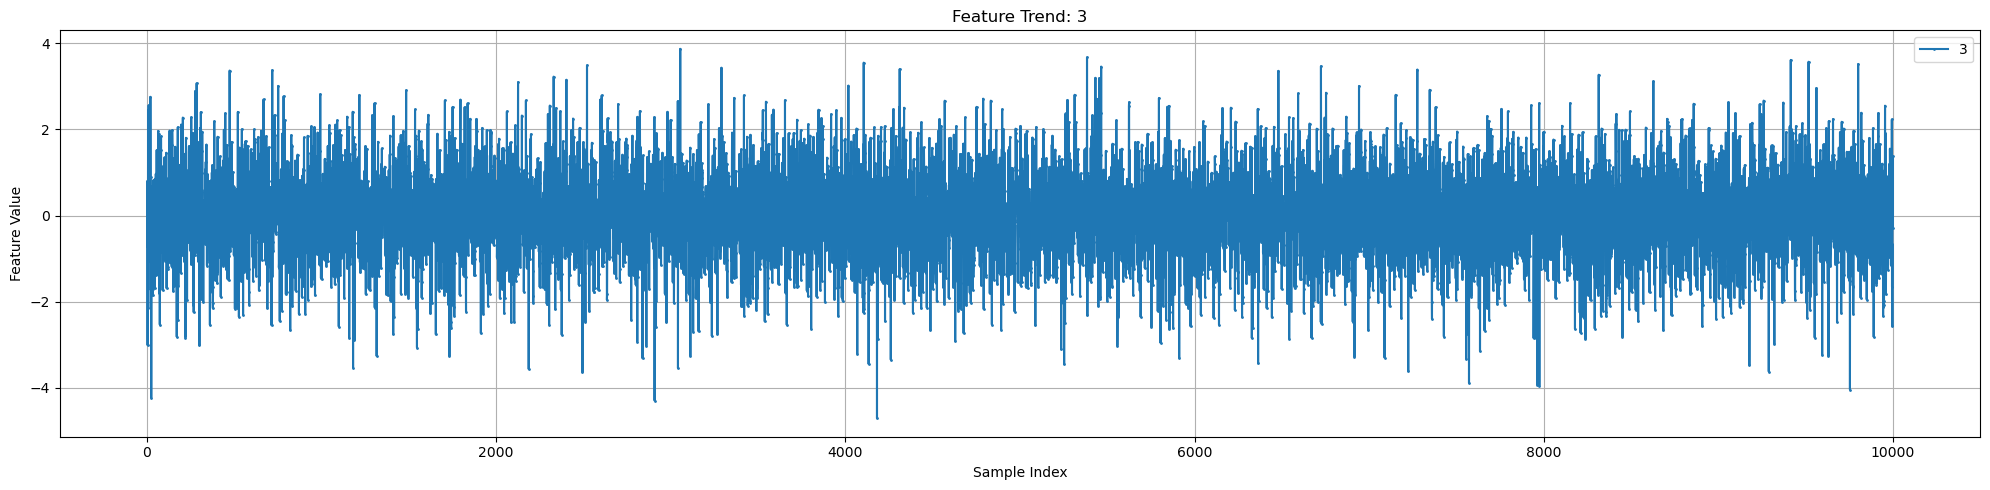

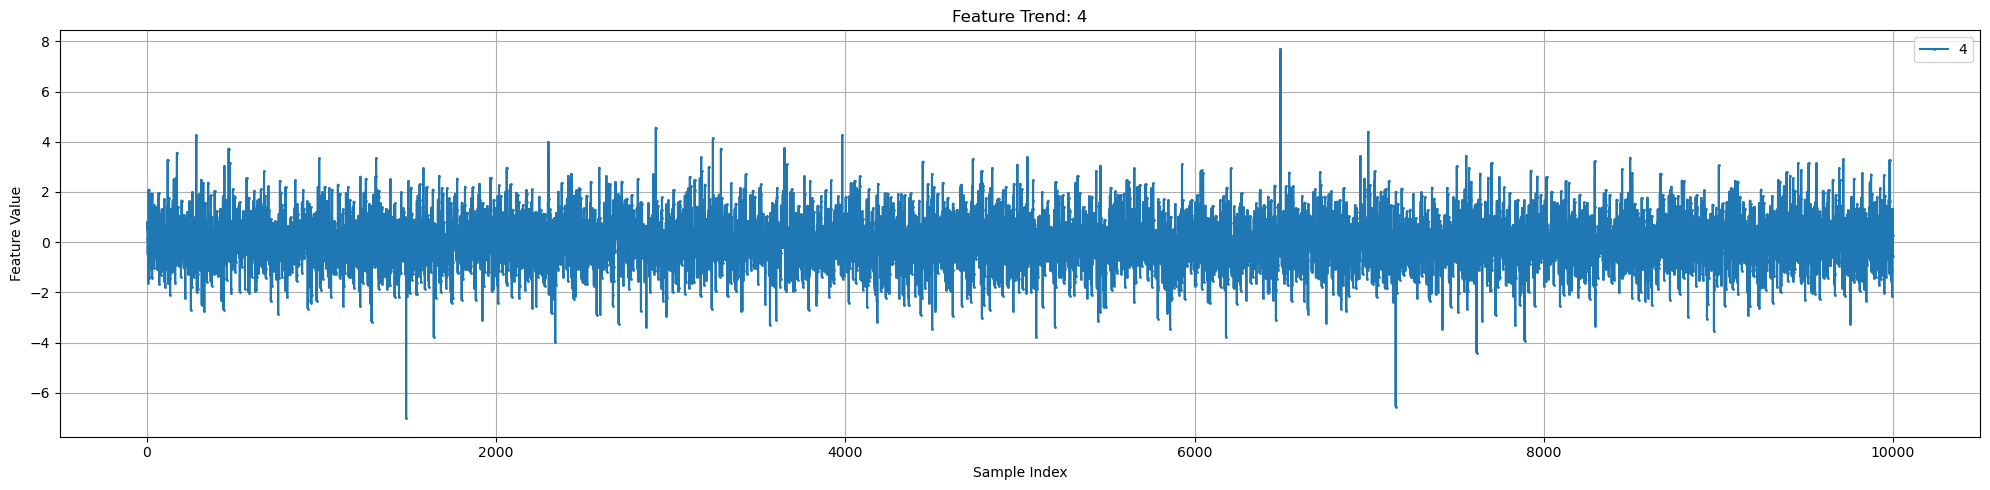

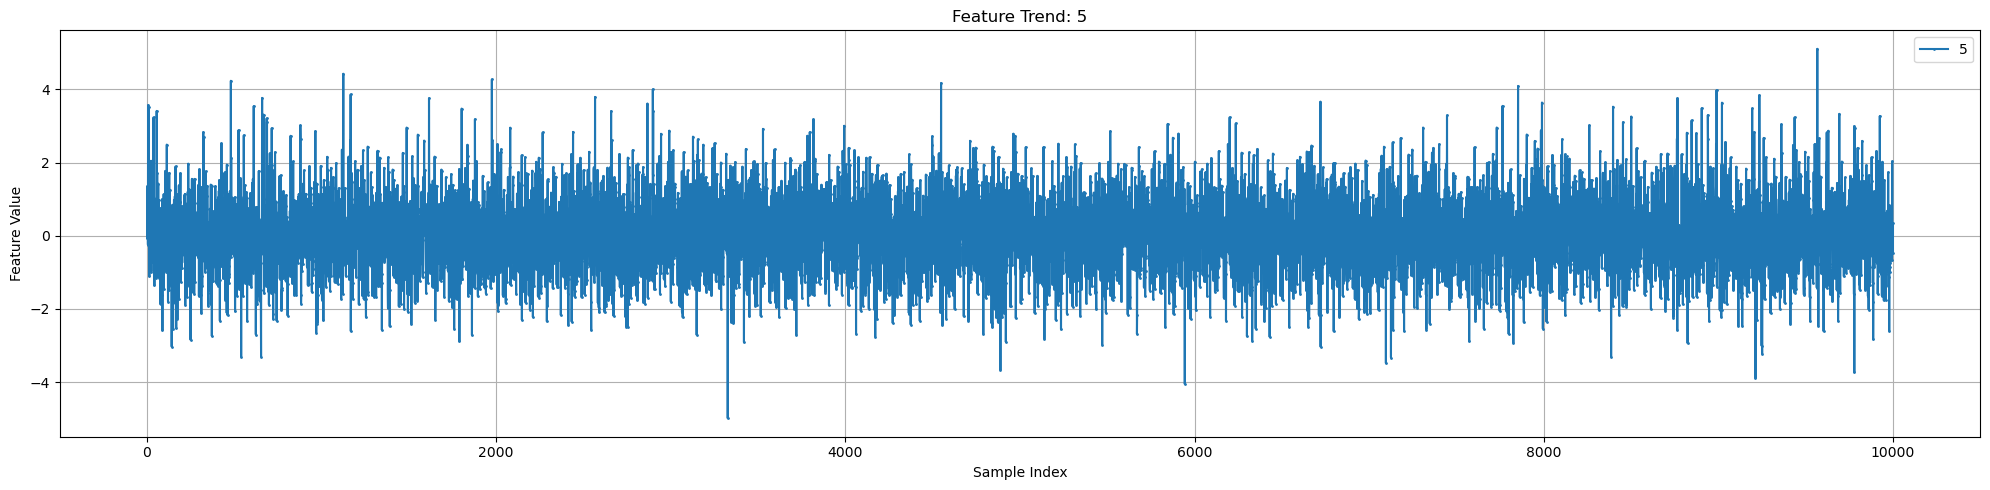

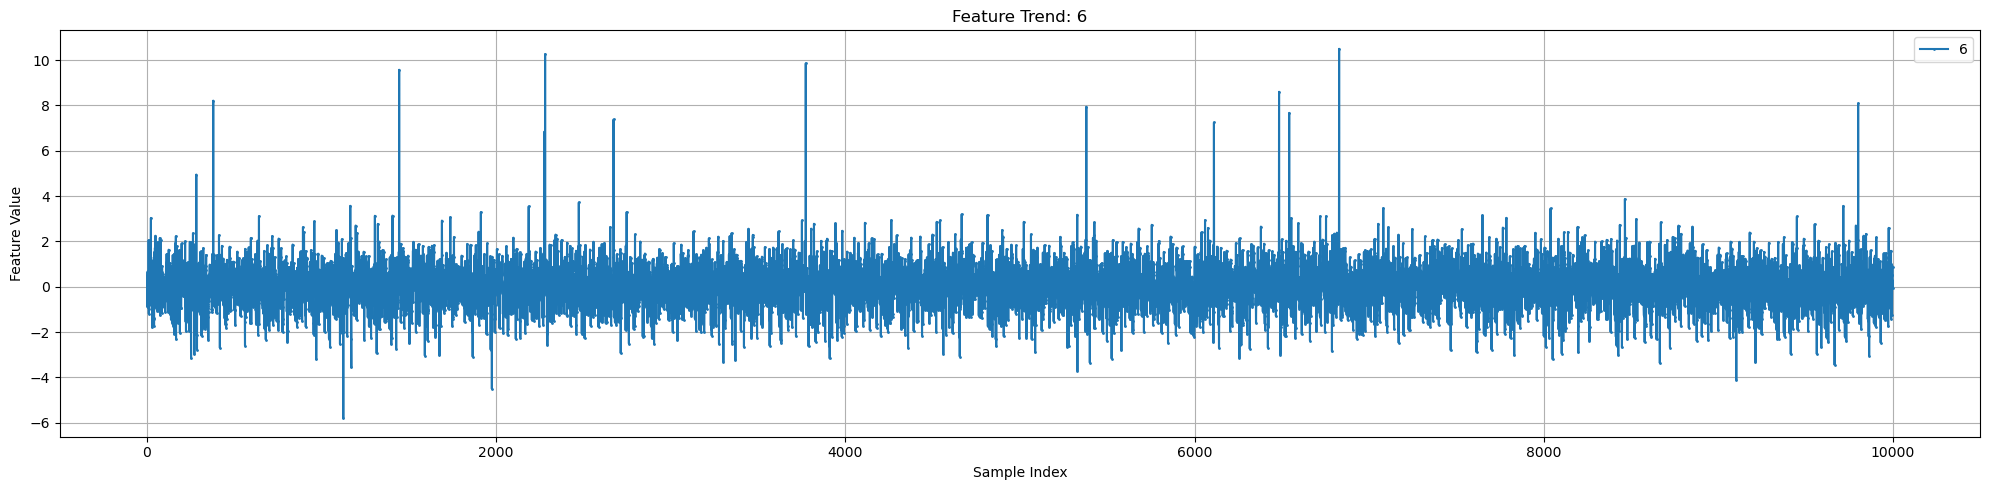

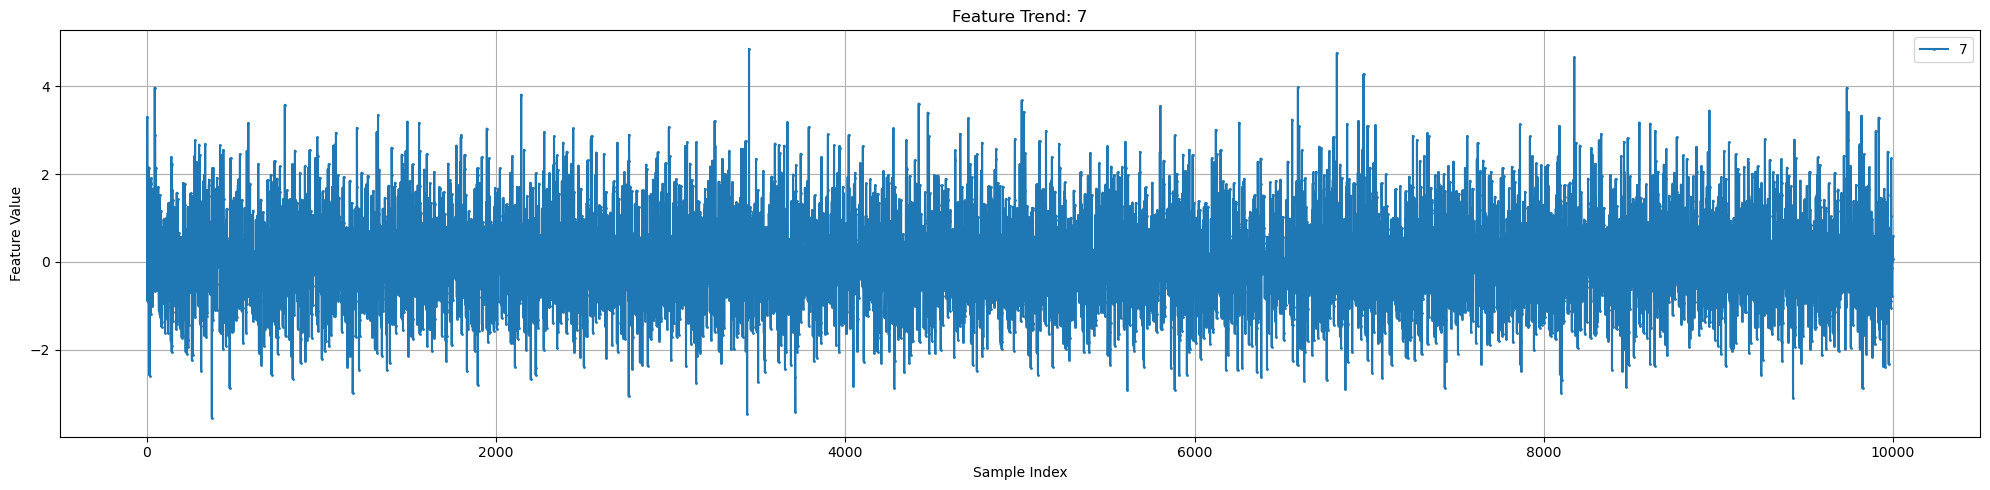

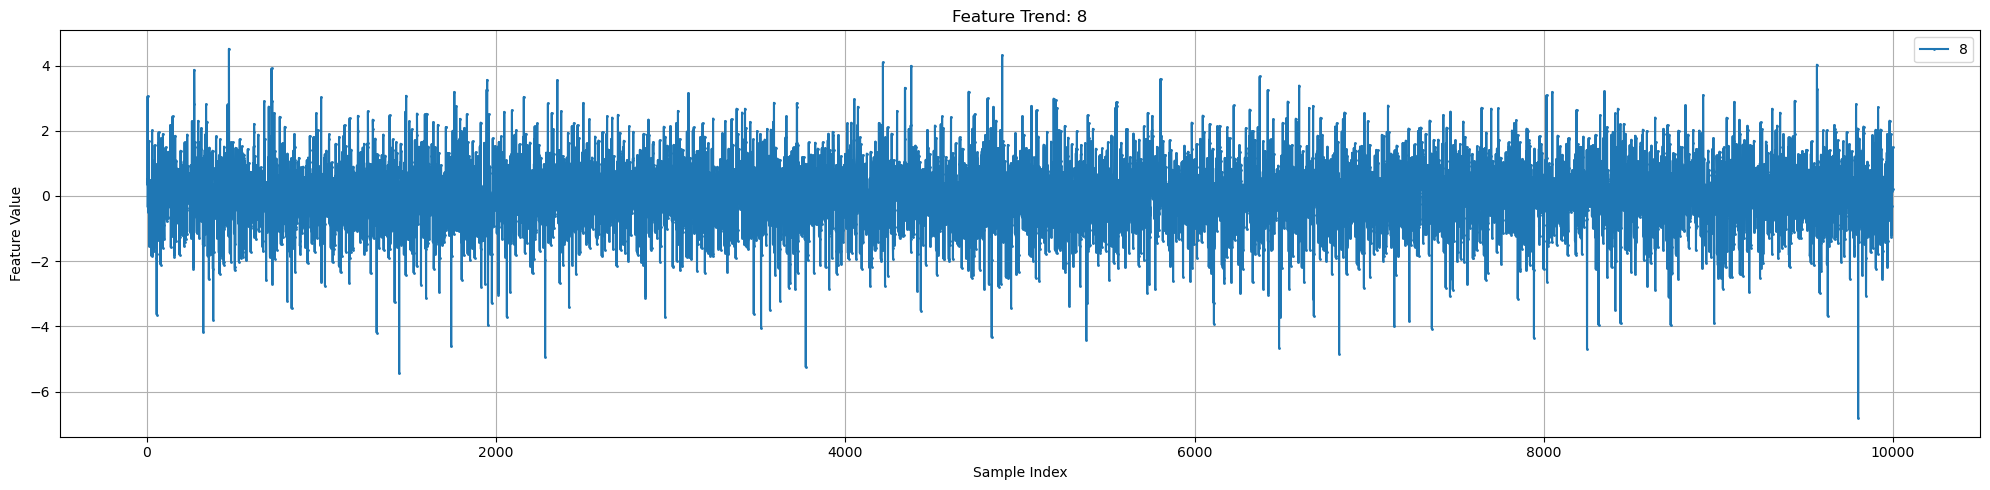

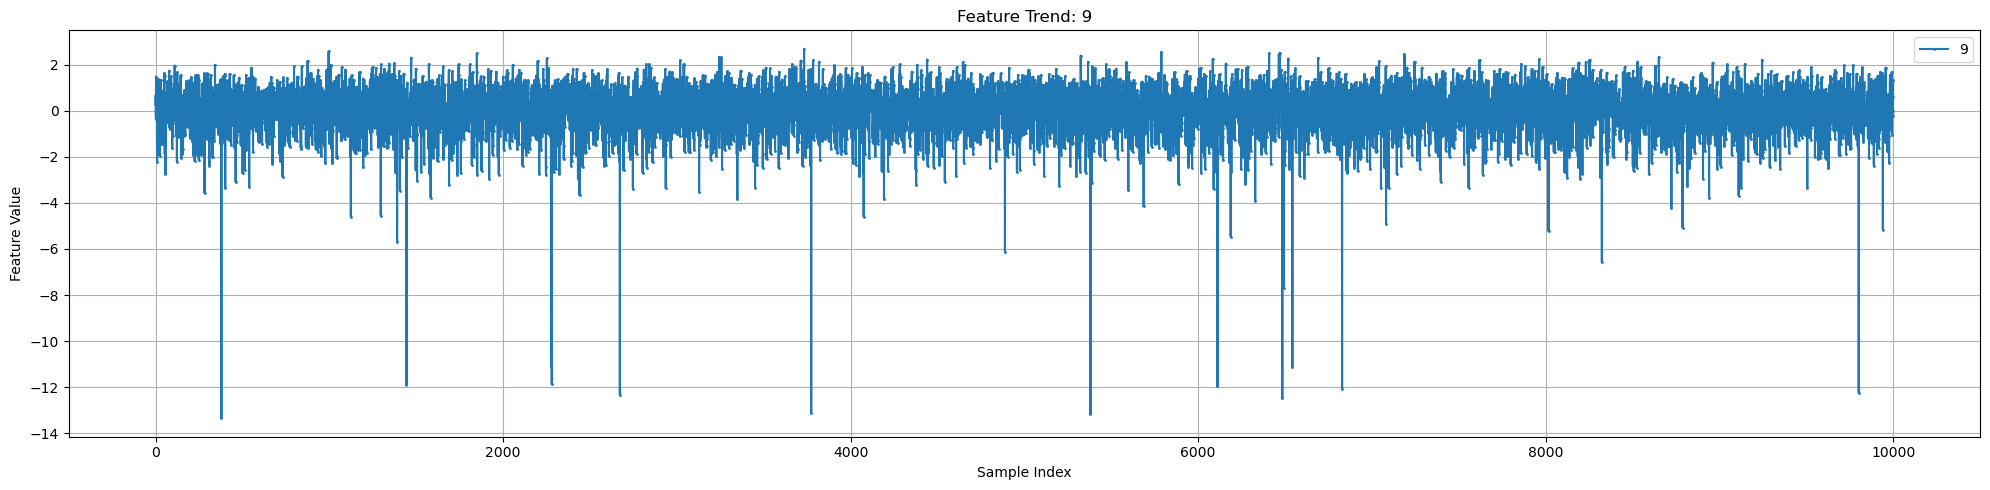

In [6]:
for column in x_train.columns[:10]:  
    plt.figure(figsize=(20, 5))
    plt.plot(x_train.index, x_train[column], marker='o', markersize=1, linestyle='-', label=column)
    plt.title(f'Feature Trend: {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Feature Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

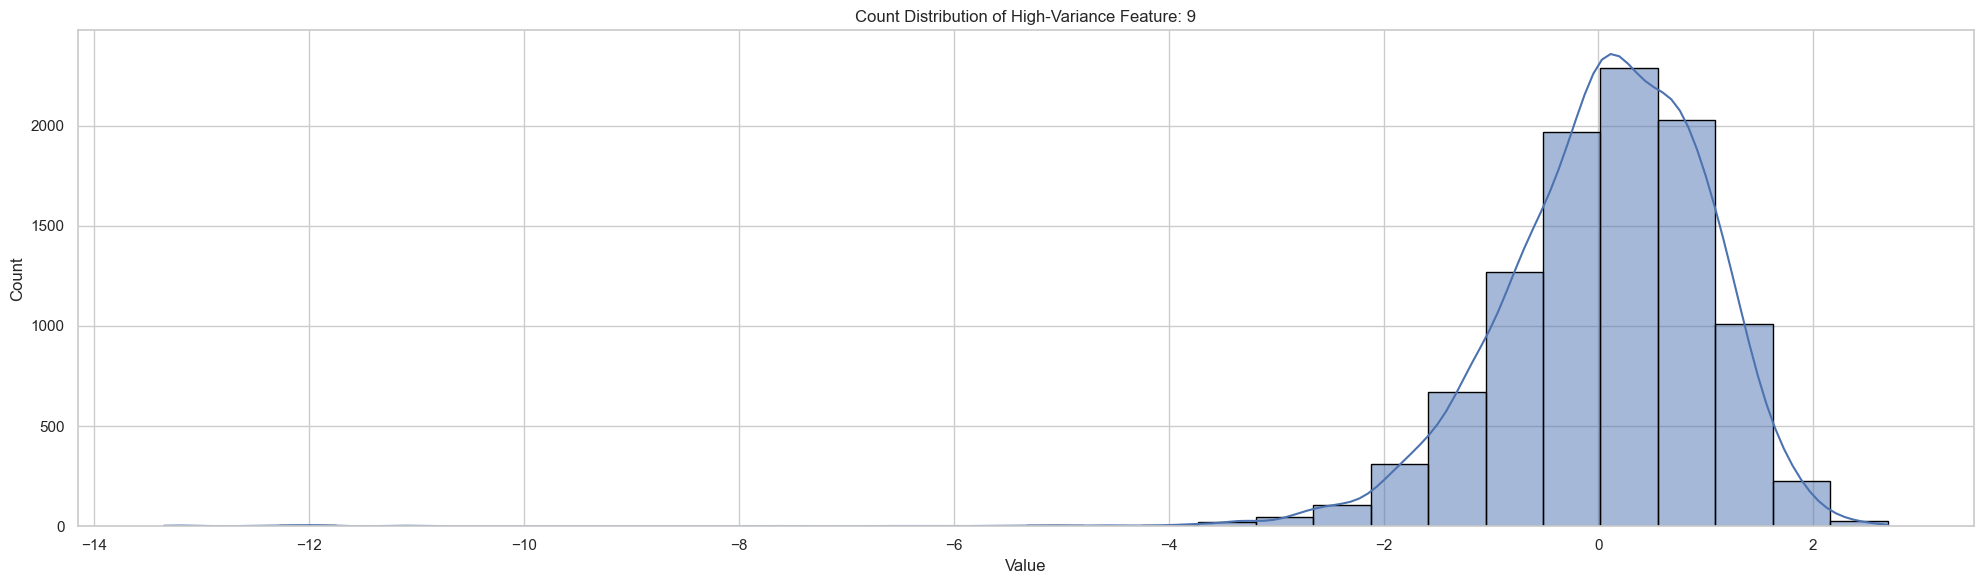

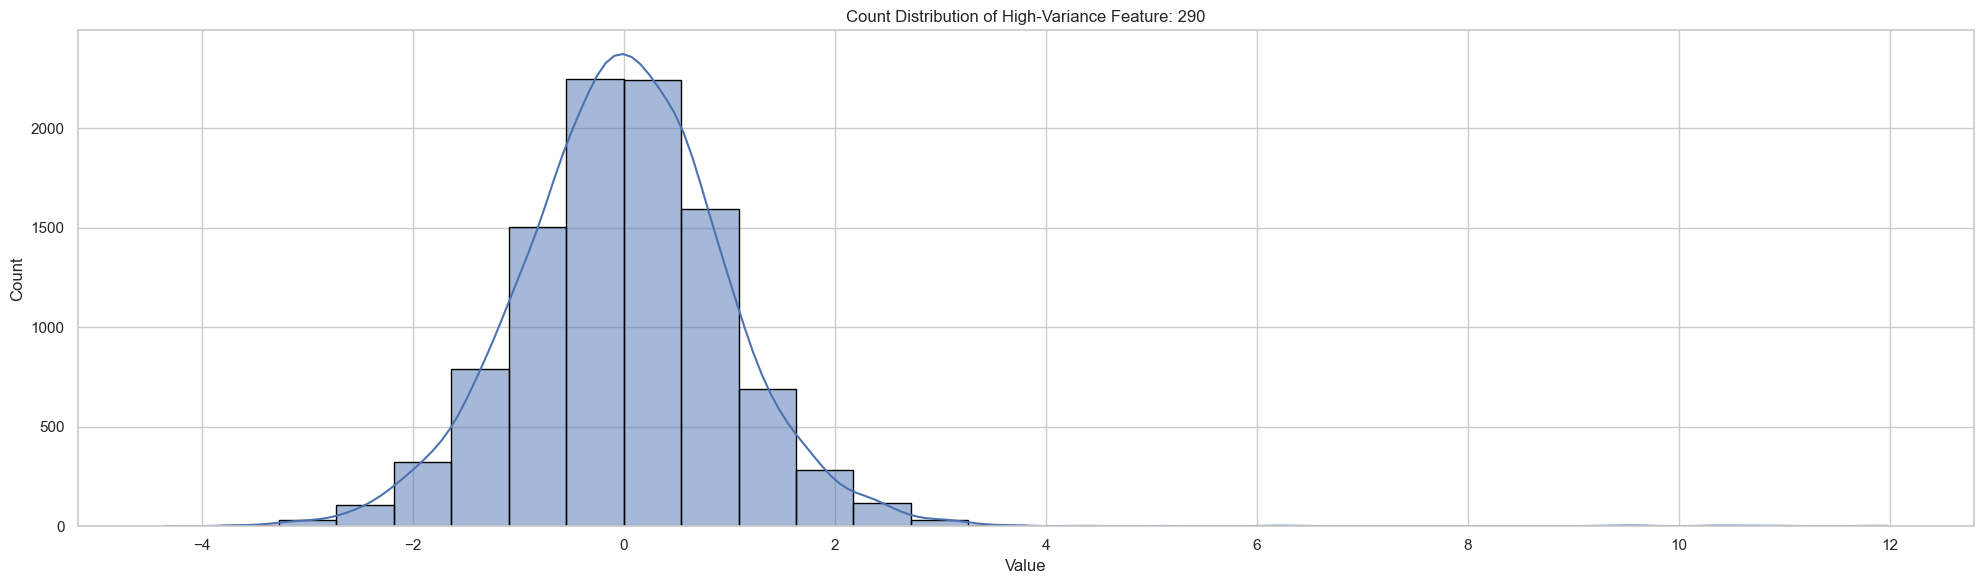

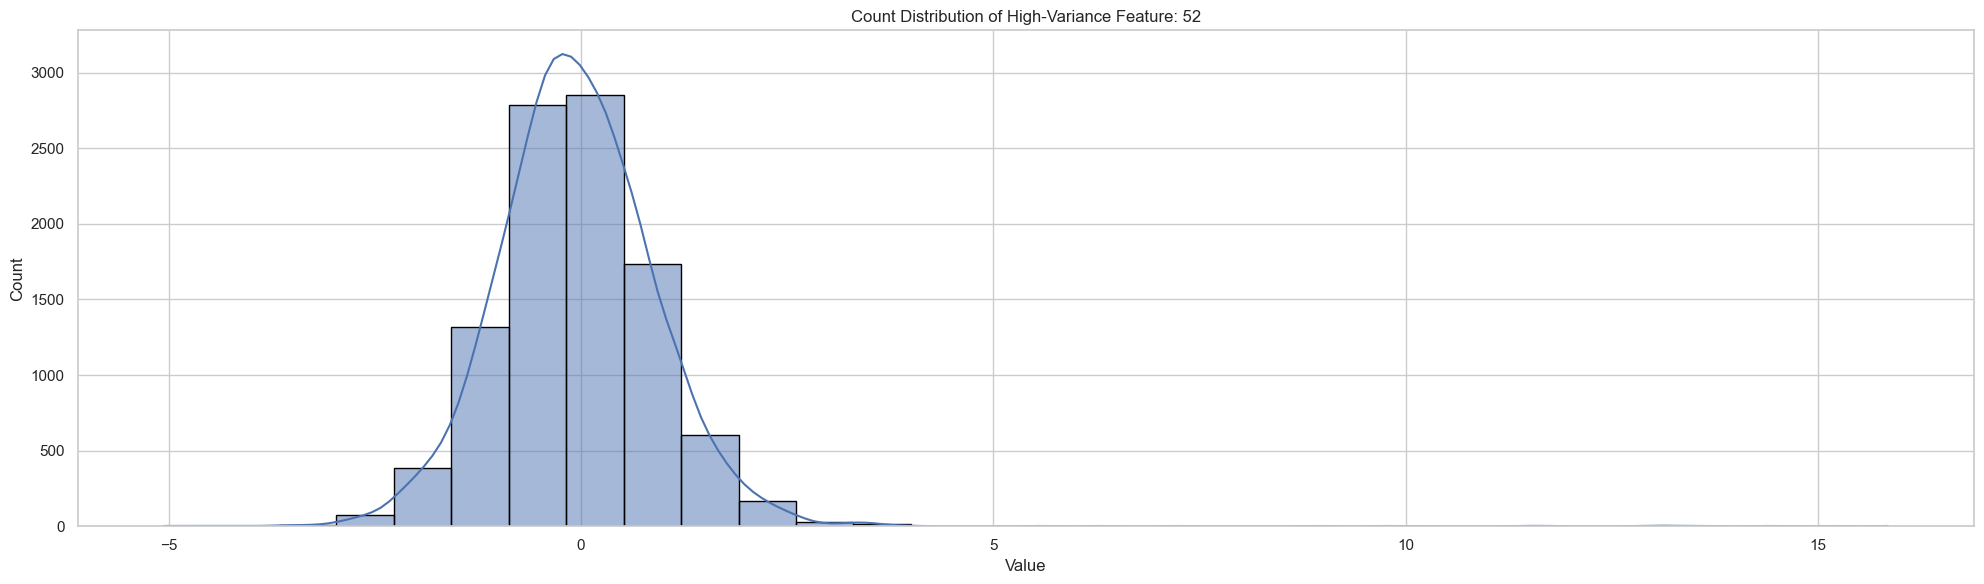

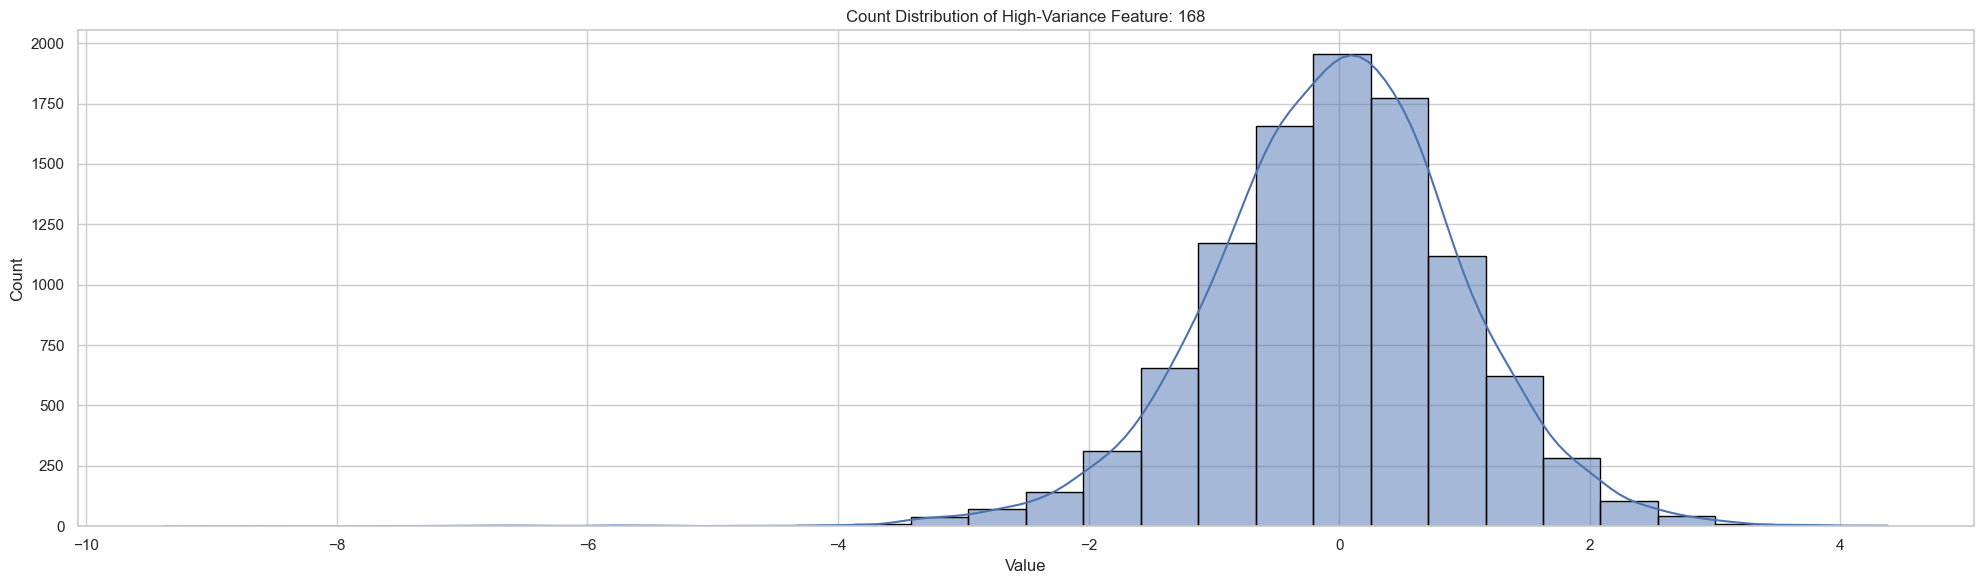

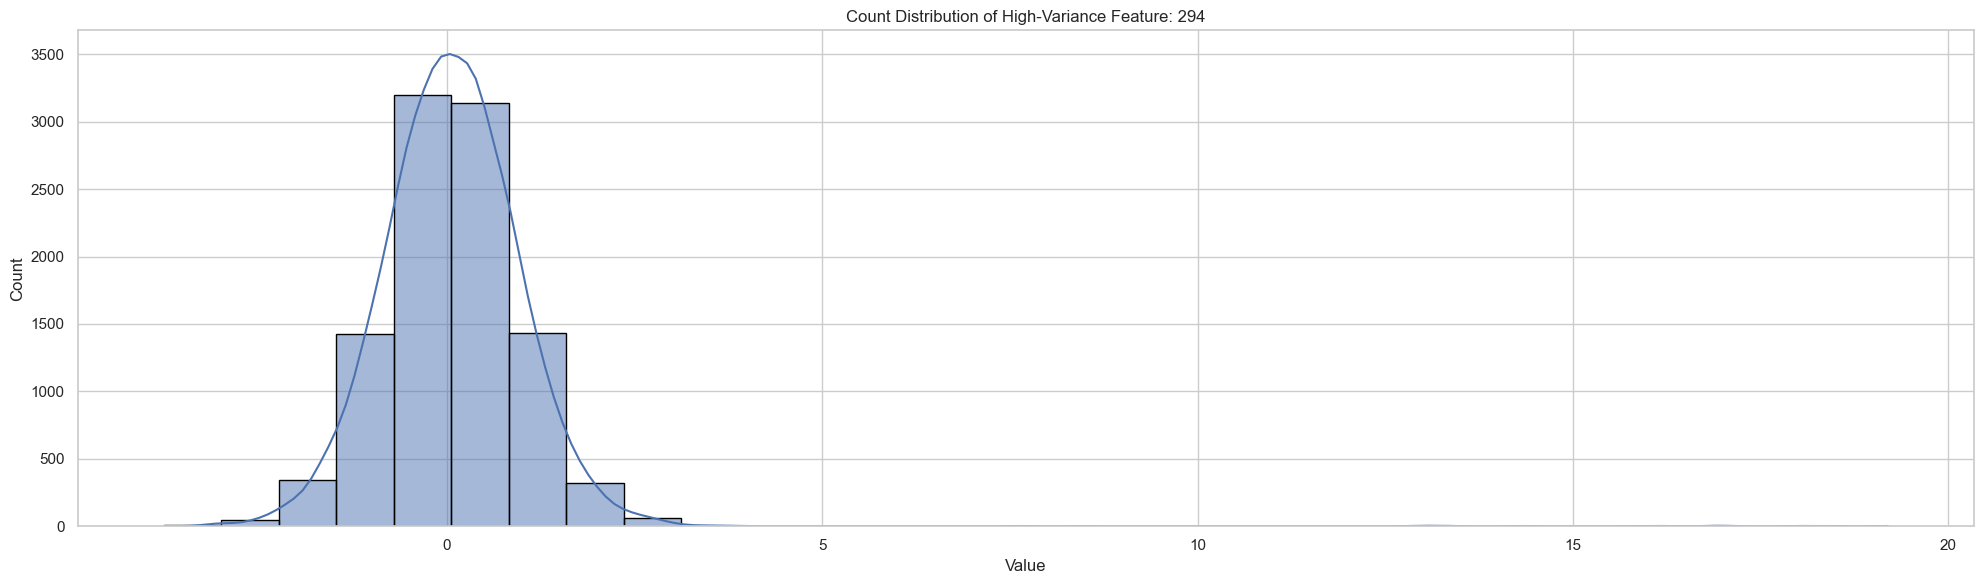

In [7]:
sns.set(style="whitegrid")
top_std_columns = x_train.std().sort_values(ascending=False).head(5).index

# 绘图
for column in top_std_columns:
    plt.figure(figsize=(20, 6))
    sns.histplot(x_train[column], bins=30, kde=True, edgecolor='black')
    plt.title(f'Count Distribution of High-Variance Feature: {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### IQR replace outlier 

In [8]:
def replace_outliers_iqr(df, threshold=1.5):
    df_clean = df.copy()
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR
        median = df_clean[col].median()

        df_clean.loc[(df_clean[col] < lower) | (df_clean[col] > upper), col] = median

    return df_clean

x_train_cleaned = replace_outliers_iqr(x_train)

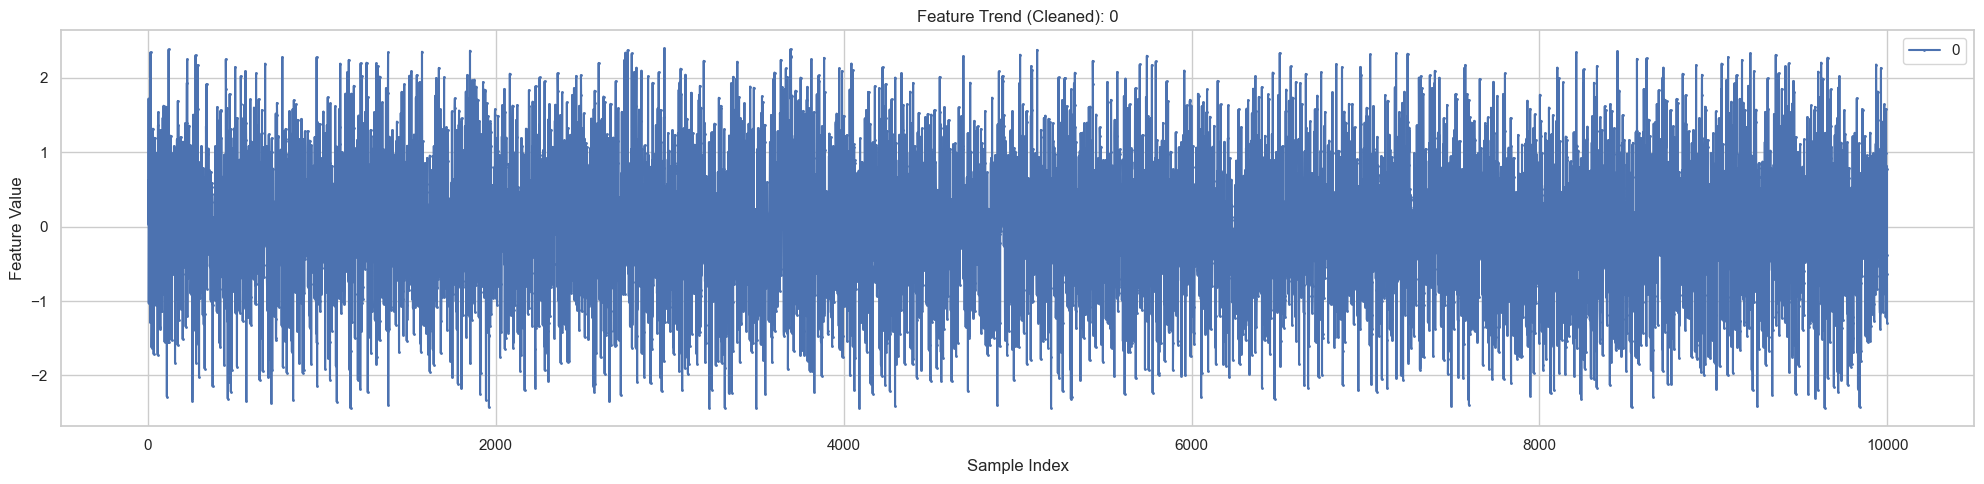

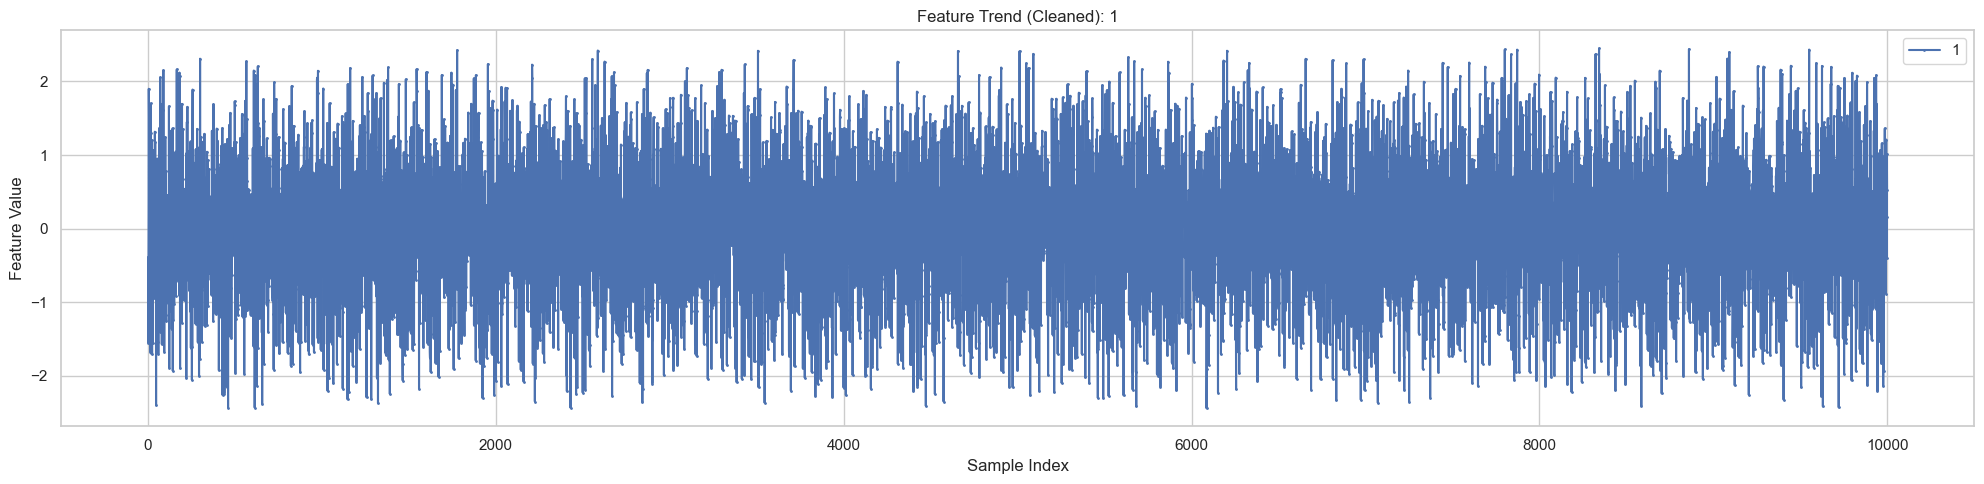

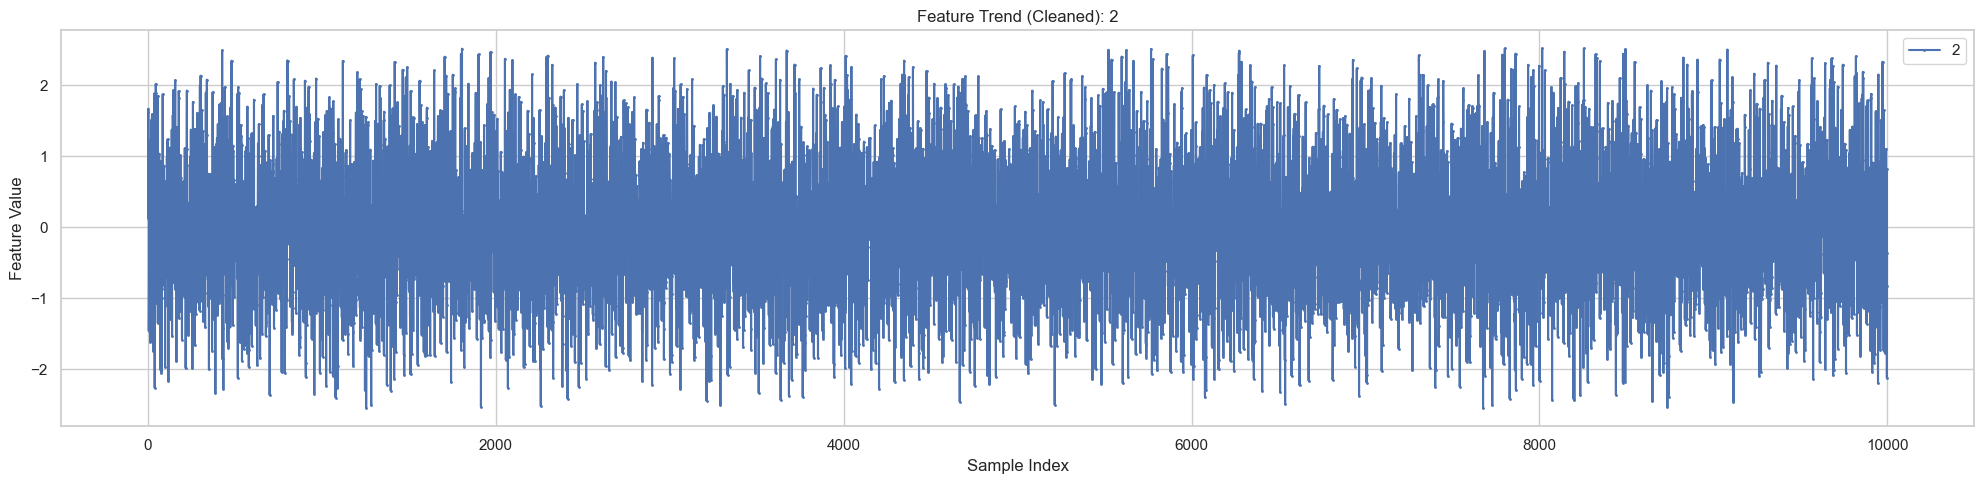

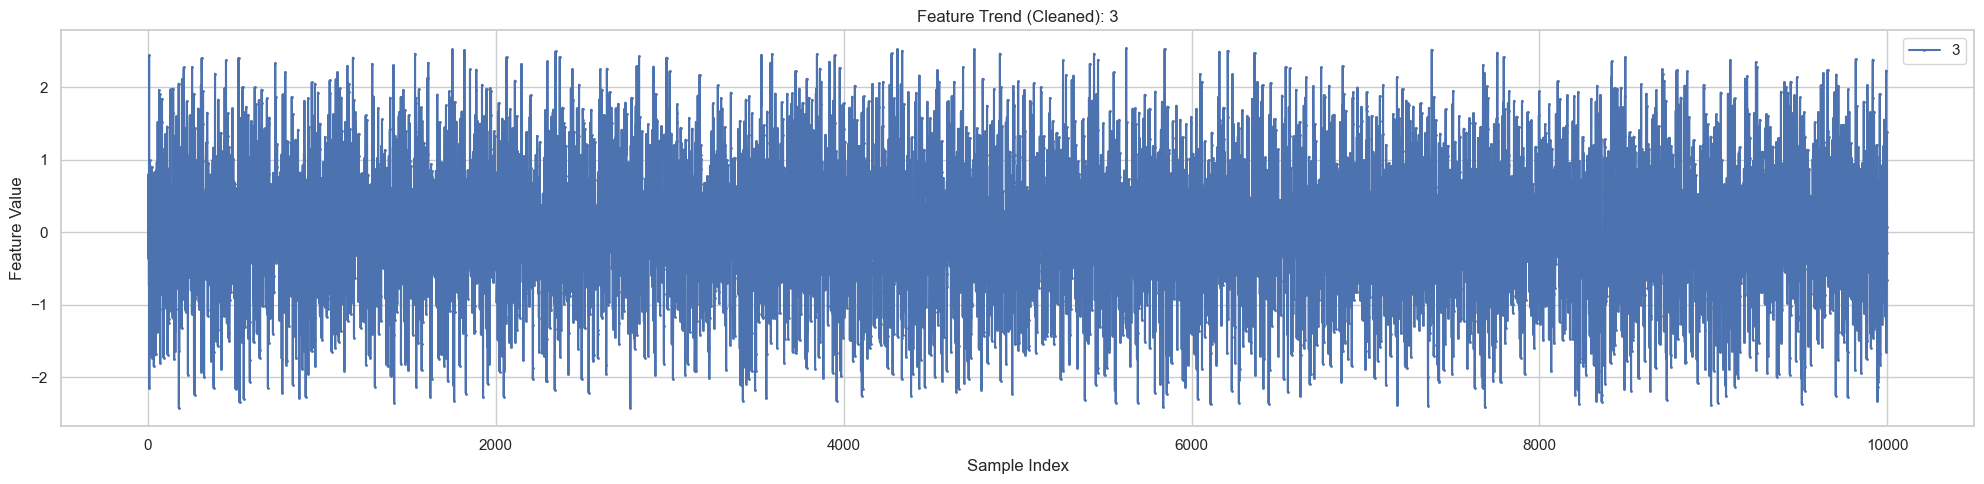

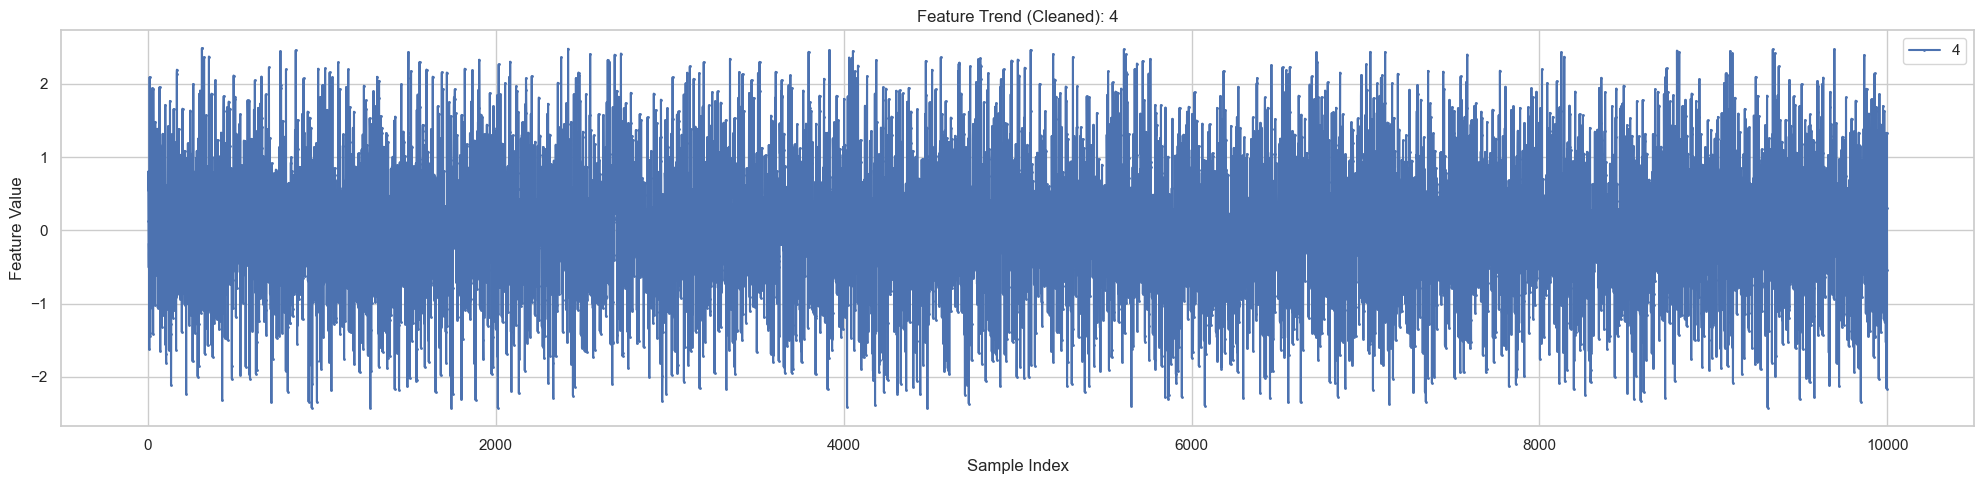

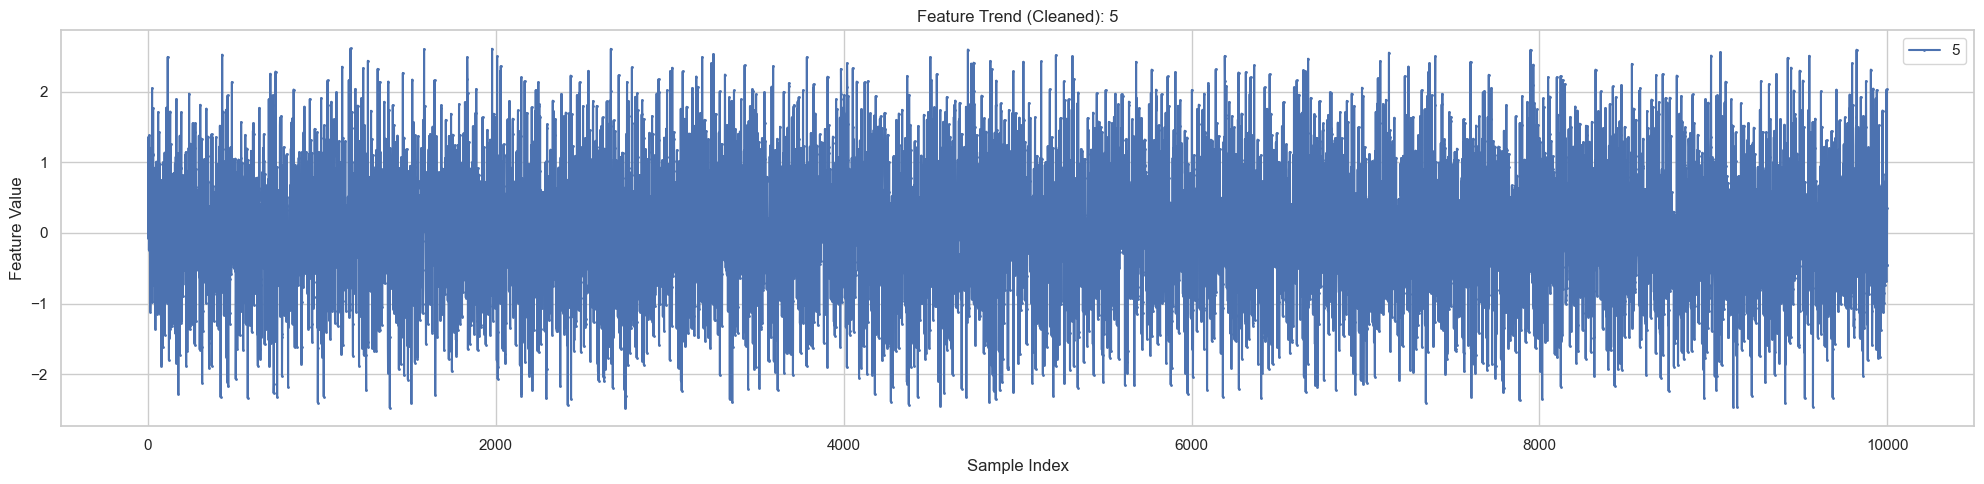

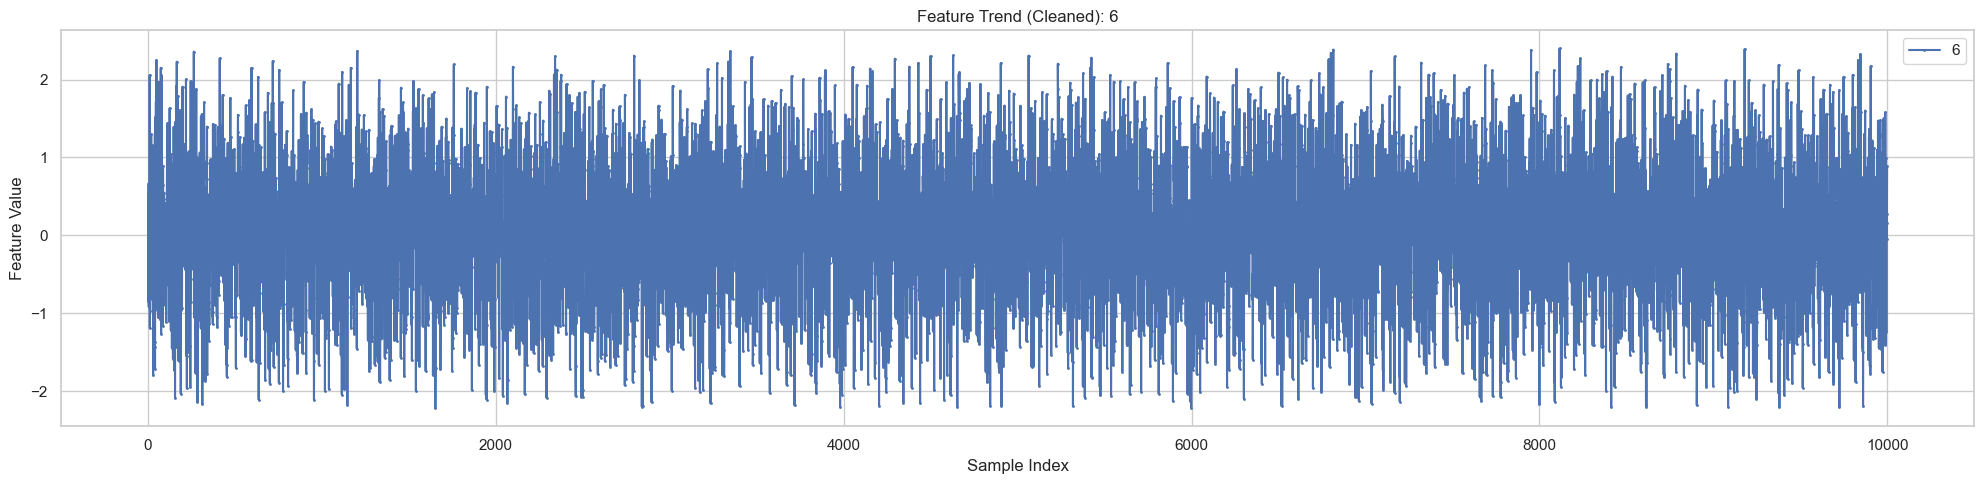

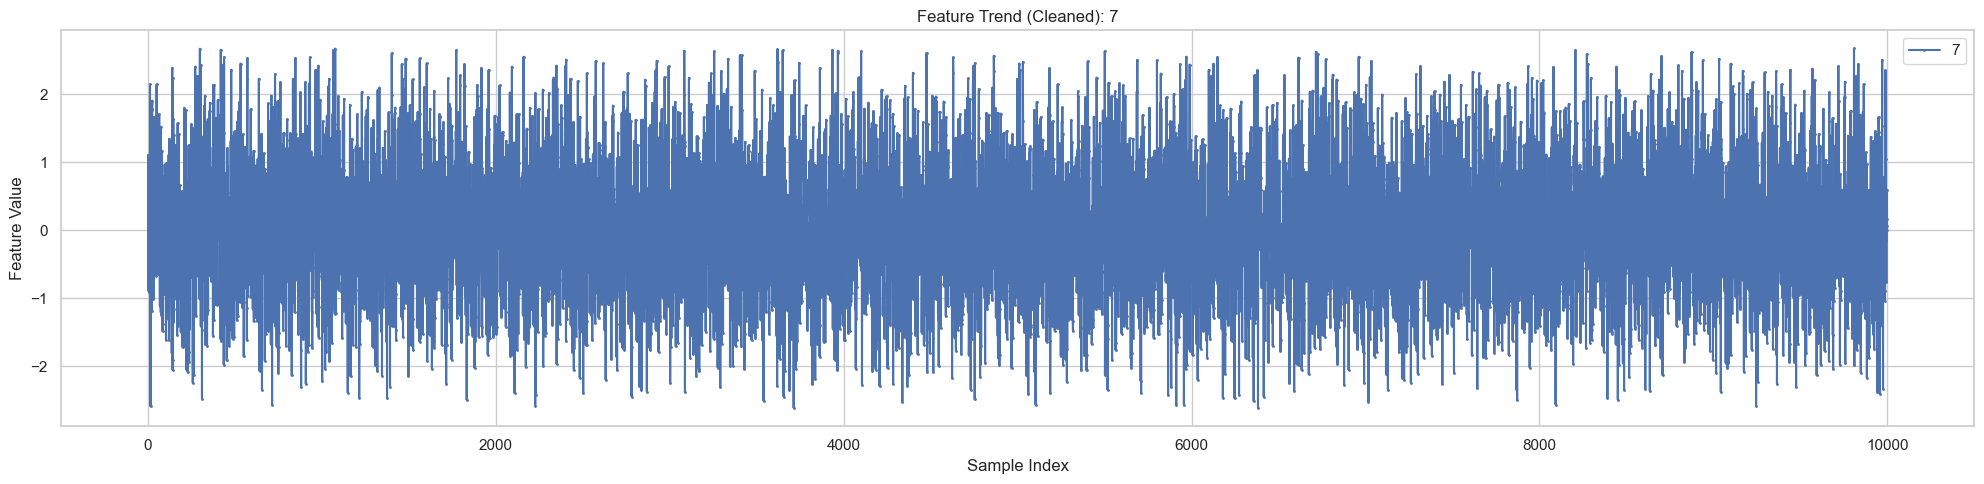

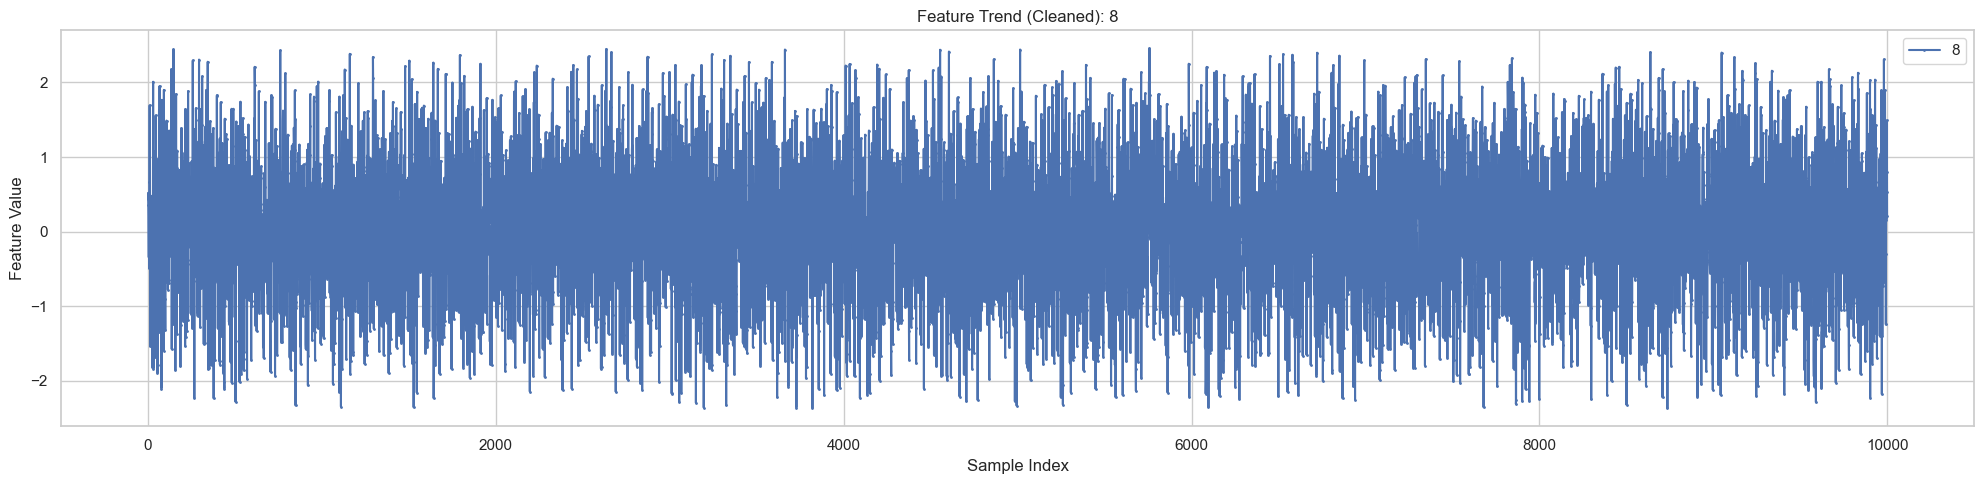

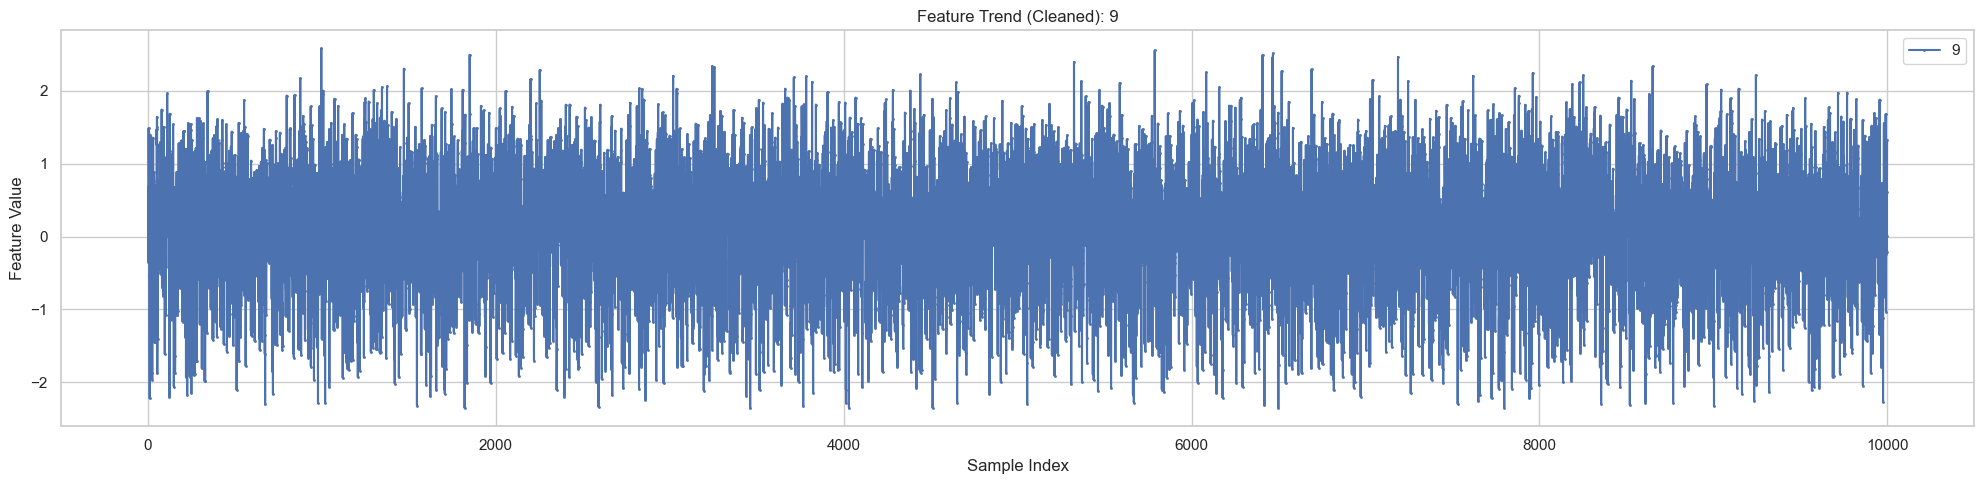

In [9]:
for column in x_train_cleaned.columns[:10]:
    plt.figure(figsize=(20, 5))
    plt.plot(x_train_cleaned.index, x_train_cleaned[column], marker='o', markersize=1, linestyle='-', label=column)
    plt.title(f'Feature Trend (Cleaned): {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Feature Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


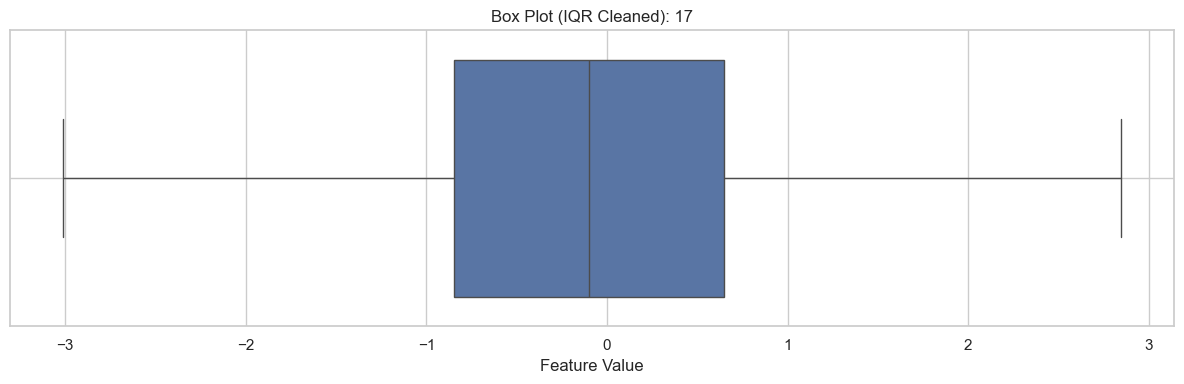

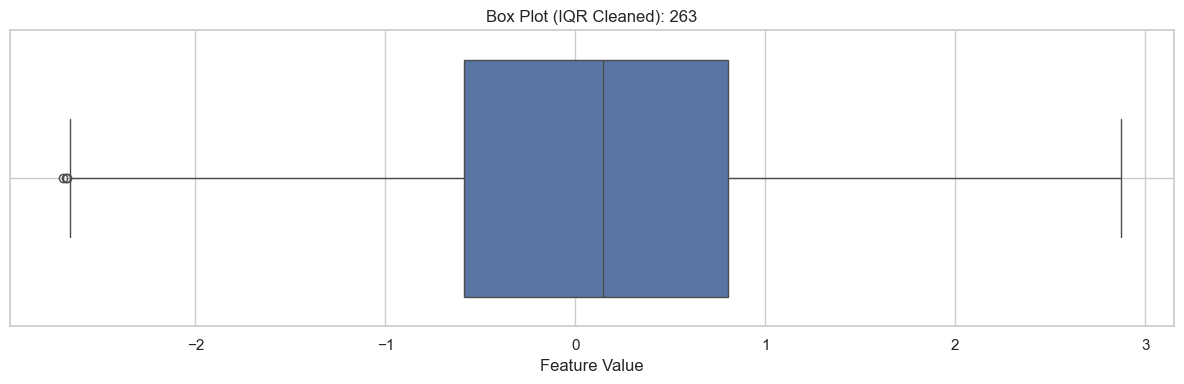

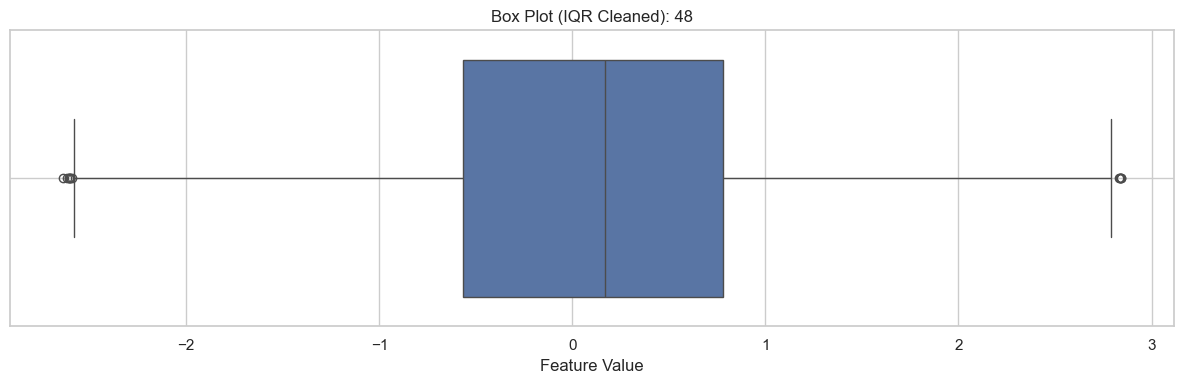

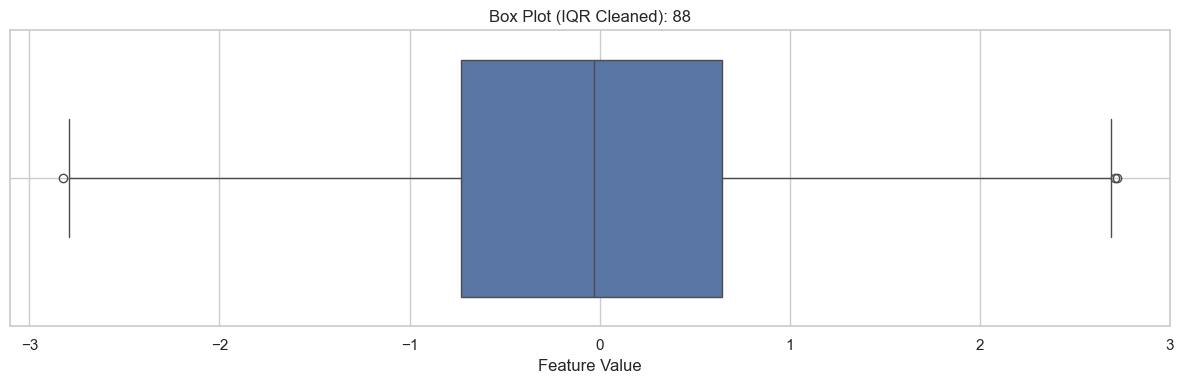

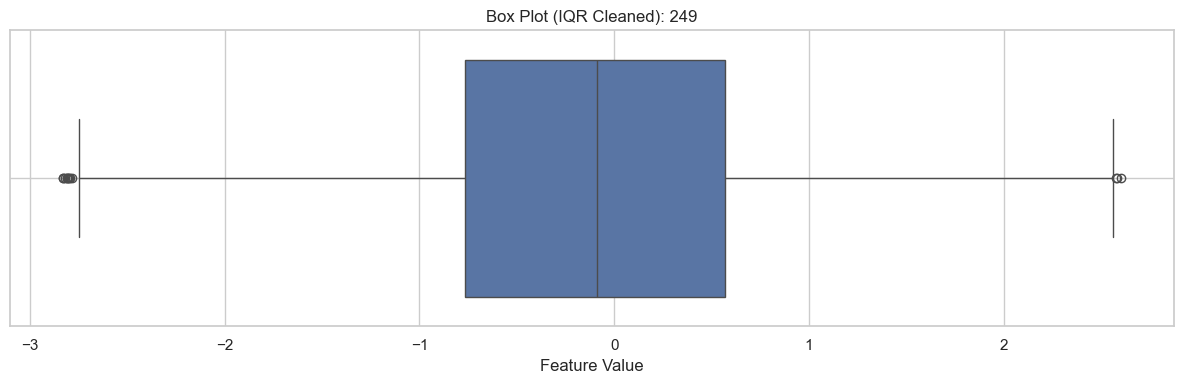

In [10]:
sns.set(style="whitegrid")
top_columns = x_train_cleaned.std().sort_values(ascending=False).head(5).index

for column in top_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=x_train_cleaned[column])
    plt.title(f'Box Plot (IQR Cleaned): {column}')
    plt.xlabel('Feature Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 2. Feature selection

<Axes: title={'center': 'Top 20 Features by Mutual Information'}>

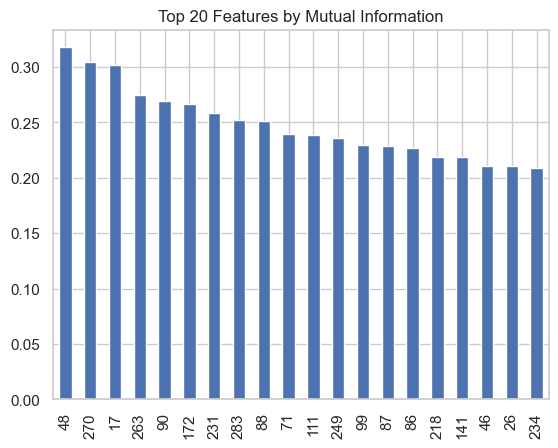

In [11]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x_train, y_train.squeeze())
mi_series = pd.Series(mi_scores, index=x_train.columns).sort_values(ascending=False)
top_mi_features = mi_series.head(20)
top_mi_features.plot(kind='bar', title='Top 20 Features by Mutual Information')

<Axes: title={'center': 'Top 20 Features by Random Forest Importance'}>

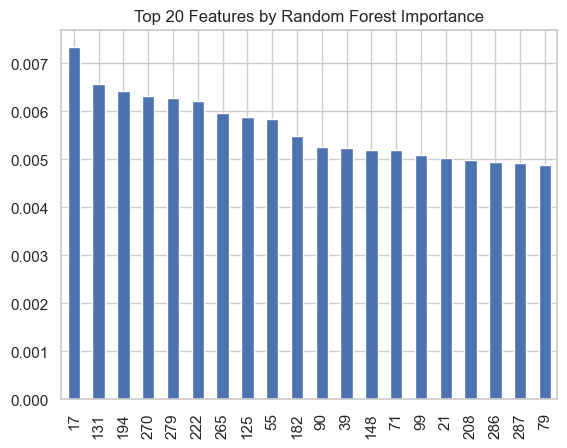

In [12]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train.values.ravel())
rf_importance = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
rf_importance.head(20).plot(kind='bar', title='Top 20 Features by Random Forest Importance')


### Cumulative Feature Importance Curve
#### Find the minimum number of features that cumulatively contribute 90% of the total number of features

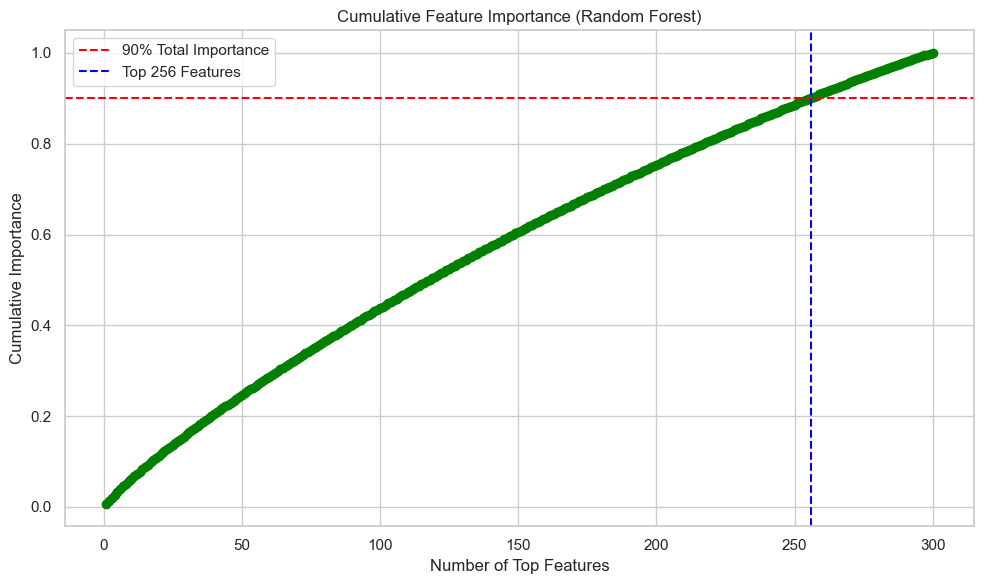

In [115]:
rf_sorted = rf_importance.sort_values(ascending=False)
cumulative_importance = np.cumsum(rf_sorted)
k_90 = np.argmax(cumulative_importance >= 0.90) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', color='green')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Total Importance')
plt.axvline(x=k_90, color='blue', linestyle='--', label=f'Top {k_90} Features')
plt.title("Cumulative Feature Importance (Random Forest)")
plt.xlabel("Number of Top Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cumulative_rf_importance_curve.png", dpi=300)
plt.show()

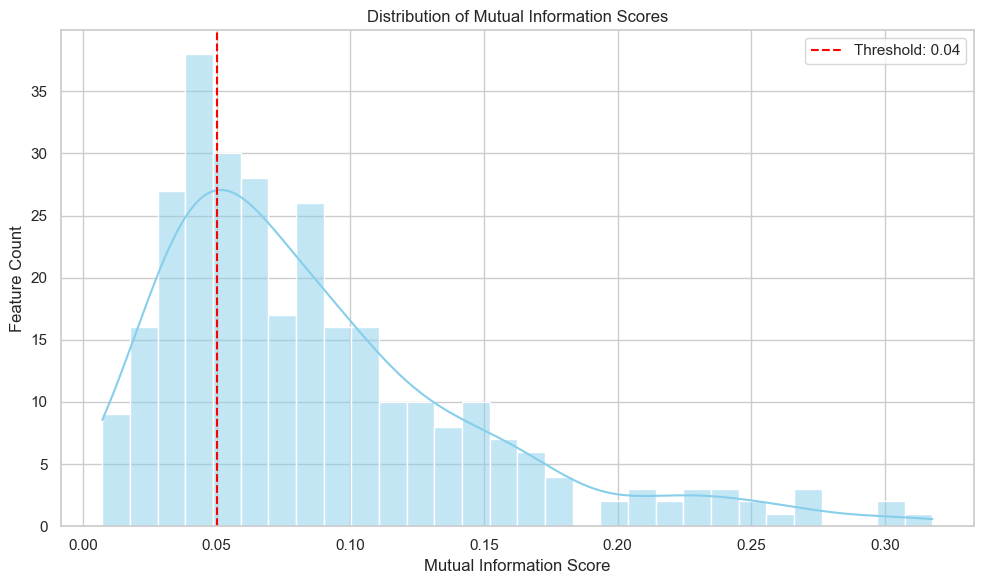

In [77]:
mi_series = mi_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(mi_series, bins=30, kde=True, color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Threshold: 0.04')
plt.title("Distribution of Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature Count")
plt.legend()
plt.tight_layout()
plt.savefig("mutual_info_distribution_threshold.png", dpi=300)
plt.show()

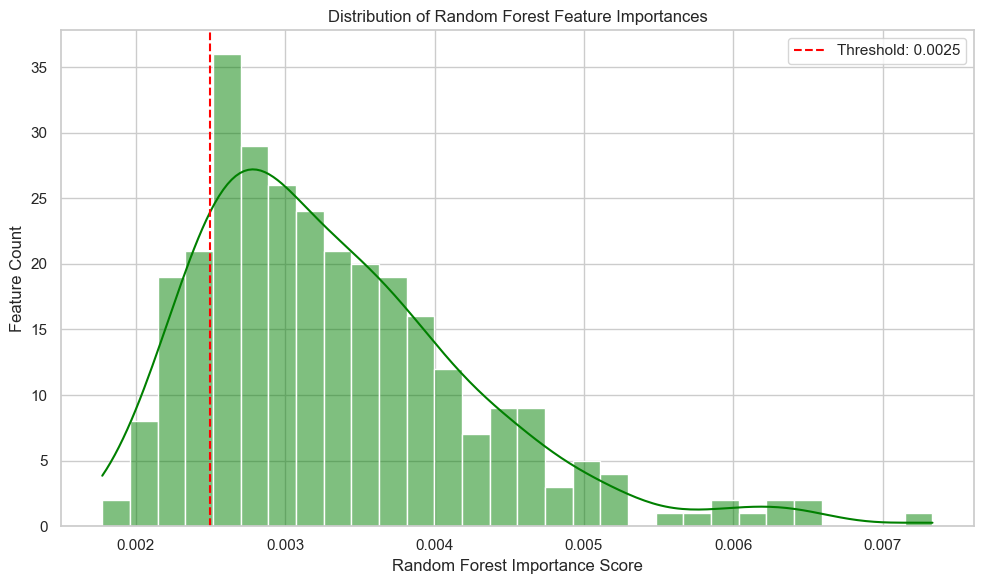

In [91]:
rf_series = rf_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(rf_series, bins=30, kde=True, color='green')
plt.axvline(x=0.0025, color='red', linestyle='--', label='Threshold: 0.0025')
plt.title("Distribution of Random Forest Feature Importances")
plt.xlabel("Random Forest Importance Score")
plt.ylabel("Feature Count")
plt.legend()
plt.tight_layout()
plt.savefig("random_forest_importance_distribution.png", dpi=300)
plt.show()

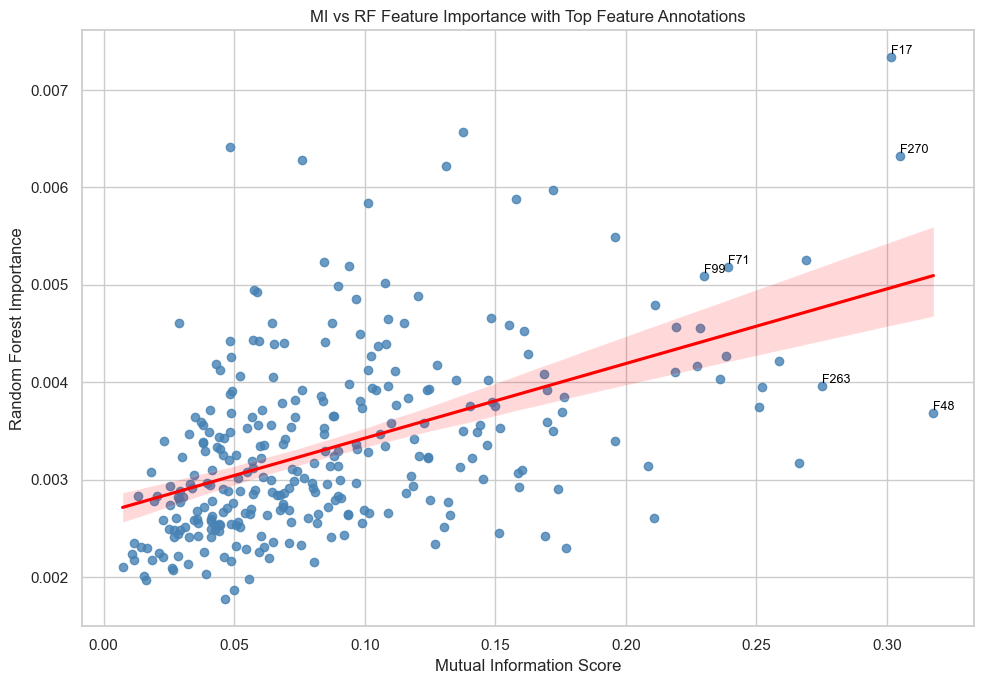

In [16]:
# Merged into DataFrame
importance_df = pd.DataFrame({
    'Mutual_Information': mi_series,
    'Random_Forest': rf_series
})

# Scatterplot + Trendline
plt.figure(figsize=(10, 7))
sns.regplot(data=importance_df, x='Mutual_Information', y='Random_Forest',
            scatter_kws={"color": "steelblue"}, line_kws={"color": "red"})
plt.title("MI vs RF Feature Importance with Top Feature Annotations")
plt.xlabel("Mutual Information Score")
plt.ylabel("Random Forest Importance")

# Specify features（feature 17, 270, 48, 263,99,71）
features_to_annotate = [17, 270, 48, 263,99,71] 
for feat in features_to_annotate:
    if str(feat) in importance_df.index:
        x = importance_df.loc[str(feat), 'Mutual_Information']
        y = importance_df.loc[str(feat), 'Random_Forest']
        plt.text(x, y, f"F{feat}", fontsize=9, color='black', ha='left', va='bottom')

plt.tight_layout()
plt.savefig("MI vs RF Feature Importance with Top Feature Annotations.png", dpi=300)
plt.show()

In [90]:
selected_mi_features = mi_series[mi_series >= 0.005].index
selected_rf_features = rf_series[rf_series >= 0.0025].index
selected_features = list(set(selected_mi_features) & set(selected_rf_features))
x_selected = x_train[selected_features]
print(selected_features)
print(len(selected_features))
print(x_selected.head())

['254', '253', '267', '219', '107', '186', '45', '294', '73', '260', '162', '225', '194', '130', '265', '159', '113', '124', '222', '261', '242', '23', '285', '89', '288', '30', '85', '42', '87', '290', '286', '79', '176', '195', '100', '116', '28', '135', '95', '67', '199', '83', '74', '131', '50', '118', '49', '51', '106', '189', '218', '59', '115', '171', '66', '55', '167', '133', '97', '103', '283', '192', '276', '43', '1', '292', '75', '209', '270', '228', '284', '41', '287', '244', '239', '168', '134', '6', '259', '161', '29', '14', '217', '19', '27', '17', '13', '163', '184', '214', '182', '26', '202', '280', '70', '227', '117', '157', '132', '5', '197', '177', '92', '122', '81', '175', '293', '57', '247', '272', '35', '213', '257', '93', '174', '149', '207', '240', '99', '249', '8', '223', '143', '190', '255', '120', '233', '297', '62', '155', '32', '24', '25', '179', '230', '40', '10', '110', '22', '268', '102', '295', '7', '278', '105', '111', '9', '77', '12', '216', '64', '1

## 3. 处理类别不均衡

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

y_train = y_train.squeeze()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_selected, y_train, test_size=0.3, stratify=y_train, random_state=42
)

### 3.1 baseline（不处理）

In [94]:
print(x_selected)
print(y_train)

           254       253       267       219       107      186        45  \
0     1.228200 -0.292660  0.331980  0.798530  1.041900  0.16186  0.020692   
1    -2.219700 -0.149640 -1.158600  0.036632  0.278230  1.33890 -1.358000   
2    -0.334460 -0.651470 -0.840810 -1.428200  0.801320  1.47030 -0.458640   
3    -0.686540  0.206290 -0.457860 -0.513140  1.468800 -1.65350 -1.747200   
4    -0.034651  0.915110  1.582200 -0.723940  0.054167 -0.45396  0.933360   
...        ...       ...       ...       ...       ...      ...       ...   
9995  1.706400 -0.004193 -0.599260  0.273190  2.415600  0.12261  1.452900   
9996 -1.735400 -0.305540 -0.439410 -0.406560  0.427330  2.17910  0.616090   
9997  0.424800 -1.490500  0.003311 -0.308960  1.011400 -0.28286  0.187730   
9998 -1.270200  2.267600  0.460980  1.276800 -1.021700  1.23000 -0.058349   
9999 -0.382920 -0.048437  0.484910 -0.753860 -0.405580  0.54725 -0.371890   

          294       73       260  ...      250      173        91       31 

📋 分类报告（未做类别平衡）：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.33      0.05      0.09        20
           4       0.54      0.52      0.53        71
           5       0.87      0.98      0.92      1344
           6       0.86      0.89      0.87       166
           7       0.53      0.29      0.38        31
           8       0.71      0.75      0.73       155
           9       0.00      0.00      0.00         8
          10       0.69      0.86      0.77       324
          11       0.56      0.39      0.46        23
          12       0.47      0.60      0.53       137
          13       0.20      0.05      0.08        19
          14       0.00      0.00      0.00        79
          15       1.00      0.62      0.77         8
          16       0.00      0.00      0.00         2
          1

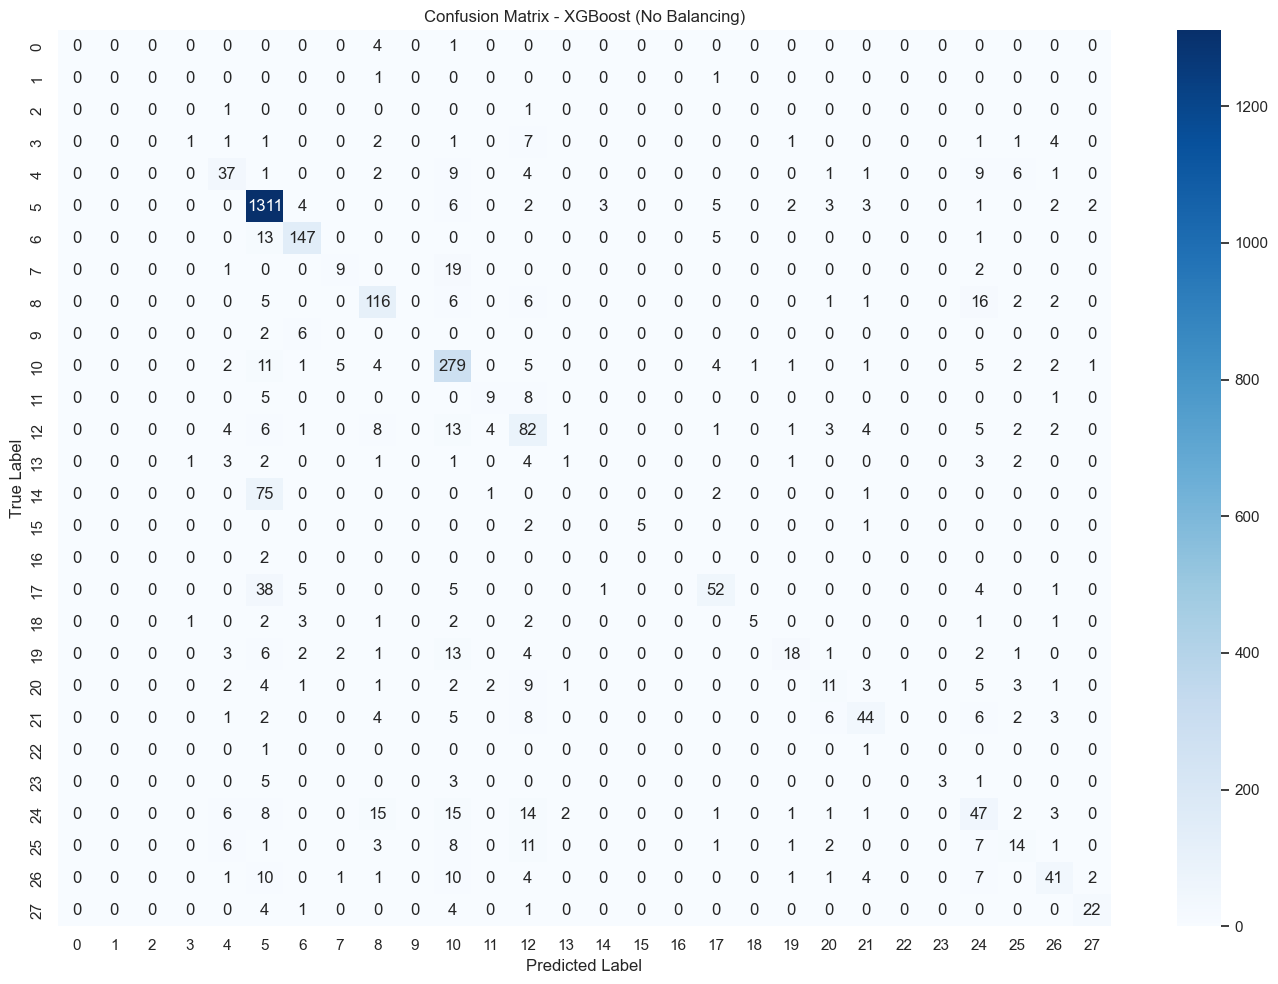

In [117]:
y_train = y_train.squeeze()

# 划分训练集和验证集
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_selected, y_train, test_size=0.3, stratify=y_train, random_state=42
)

# 初始化模型（不做类别平衡）
clf_xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    random_state=42
)

# 拟合模型（不传 sample_weight）
clf_xgb.fit(x_train_split, y_train_split)

# 验证集预测
y_pred = clf_xgb.predict(x_val_split)

# 输出分类报告
print("📋 分类报告（未做类别平衡）：")
print(classification_report(y_val_split, y_pred, zero_division=0))

# 混淆矩阵可视化
conf_matrix = confusion_matrix(y_val_split, y_pred)
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost (No Balancing)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### 3.2 Imbalance in treatment categories（进行处理）

#### Method1 class_weight='balanced'

In [95]:
clf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_balanced.fit(x_train_split, y_train_split)
y_pred_bal = clf_balanced.predict(x_val_split)

print("Method1 class_weight='balanced'")
print(classification_report(y_val_split, y_pred_bal, digits=3))

Method1 class_weight='balanced'
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.000     0.000     0.000         2
           2      0.000     0.000     0.000         2
           3      0.000     0.000     0.000        20
           4      0.625     0.211     0.316        71
           5      0.705     0.997     0.826      1344
           6      0.909     0.723     0.805       166
           7      0.000     0.000     0.000        31
           8      0.686     0.703     0.694       155
           9      0.000     0.000     0.000         8
          10      0.544     0.867     0.668       324
          11      0.500     0.174     0.258        23
          12      0.455     0.438     0.446       137
          13      0.000     0.000     0.000        19
          14      0.000     0.000     0.000        79
          15      1.000     0.250     0.400         8
          16      0.000     0.000     0.000      

/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Method2 SMOTE 

In [96]:
smote = SMOTE(k_neighbors=3, sampling_strategy='not majority', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_split, y_train_split)

clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
clf_smote.fit(x_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(x_val_split)

print("Method2 SMOTE'")
print(classification_report(y_val_split, y_pred_smote, digits=3))

Method2 SMOTE'
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.000     0.000     0.000         2
           2      0.000     0.000     0.000         2
           3      0.167     0.050     0.077        20
           4      0.466     0.479     0.472        71
           5      0.860     0.957     0.906      1344
           6      0.834     0.910     0.870       166
           7      0.706     0.387     0.500        31
           8      0.628     0.806     0.706       155
           9      0.000     0.000     0.000         8
          10      0.698     0.855     0.768       324
          11      0.500     0.652     0.566        23
          12      0.417     0.533     0.468       137
          13      0.000     0.000     0.000        19
          14      0.048     0.013     0.020        79
          15      0.800     0.500     0.615         8
          16      0.000     0.000     0.000         2
          17

/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Method3 undersample majority class

In [97]:
undersampler = RandomUnderSampler(random_state=42)
x_train_under, y_train_under = undersampler.fit_resample(x_train_split, y_train_split)

clf_under = RandomForestClassifier(n_estimators=100, random_state=42)
clf_under.fit(x_train_under, y_train_under)
y_pred_under = clf_under.predict(x_val_split)

print("Method3 undersample majority class")
print(classification_report(y_val_split, y_pred_under, digits=3))

Method3 undersample majority class
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.000     0.000     0.000         2
           2      0.023     1.000     0.045         2
           3      0.036     0.100     0.053        20
           4      0.109     0.085     0.095        71
           5      0.862     0.135     0.233      1344
           6      0.455     0.428     0.441       166
           7      0.208     0.323     0.253        31
           8      0.626     0.432     0.511       155
           9      0.031     0.500     0.059         8
          10      0.759     0.185     0.298       324
          11      0.298     0.609     0.400        23
          12      0.368     0.051     0.090       137
          13      0.000     0.000     0.000        19
          14      0.059     0.532     0.106        79
          15      0.027     0.125     0.044         8
          16      0.000     0.000     0.000   

### 3.3 Imbalance in treatment categories（进一步进行对不平衡类的处理）

#### 1. SMOTE + TomekLinks
#### 清理掉模糊边界的 majority 类噪声点，让小类预测更精准

In [98]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

smote = SMOTE(k_neighbors=3, sampling_strategy='not majority', random_state=42)
smote_tomek = SMOTETomek(smote=smote, random_state=42)

# 重新采样
x_train_smt, y_train_smt = smote_tomek.fit_resample(x_train_split, y_train_split)

# 模型训练
clf_smt = RandomForestClassifier(n_estimators=100, random_state=42)
clf_smt.fit(x_train_smt, y_train_smt)

# 评估
y_pred_smt = clf_smt.predict(x_val_split)
print(classification_report(y_val_split, y_pred_smt, zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.17      0.05      0.08        20
           4       0.47      0.48      0.47        71
           5       0.86      0.96      0.91      1344
           6       0.83      0.91      0.87       166
           7       0.71      0.39      0.50        31
           8       0.63      0.81      0.71       155
           9       0.00      0.00      0.00         8
          10       0.70      0.85      0.77       324
          11       0.50      0.65      0.57        23
          12       0.42      0.53      0.47       137
          13       0.00      0.00      0.00        19
          14       0.05      0.01      0.02        79
          15       0.80      0.50      0.62         8
          16       0.00      0.00      0.00         2
          17       0.82    

#### 2. XGBoost + scale_pos_weight

In [99]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_split),
    y=y_train_split
)

# 将其转为 dict
class_weights_dict = dict(zip(np.unique(y_train_split), class_weights_array))

clf_xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    random_state=42
)

# 将 class_weight 转换为 sample_weight
sample_weights = y_train_split.map(class_weights_dict)

# 拟合时传入 sample_weight
clf_xgb.fit(x_train_split, y_train_split, sample_weight=sample_weights)
y_pred = clf_xgb.predict(x_val_split)
print(classification_report(y_val_split, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.33      0.10      0.15        20
           4       0.53      0.58      0.55        71
           5       0.90      0.96      0.93      1344
           6       0.83      0.87      0.85       166
           7       0.52      0.35      0.42        31
           8       0.66      0.78      0.71       155
           9       0.00      0.00      0.00         8
          10       0.74      0.84      0.79       324
          11       0.55      0.70      0.62        23
          12       0.45      0.52      0.48       137
          13       0.20      0.11      0.14        19
          14       0.29      0.06      0.10        79
          15       0.71      0.62      0.67         8
          16       0.00      0.00      0.00         2
          17       0.74    

In [100]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 主类选择函数
def get_main_classes(y_series, top_k=4, min_support=None):
    label_counts = y_series.value_counts()
    if min_support is not None:
        return label_counts[label_counts >= min_support].index.tolist()
    else:
        return label_counts.head(top_k).index.tolist()

# Two-Stage 分类主函数
def run_two_stage_full(x_train, y_train, x_val, y_val, main_classes):
    # ✅ Stage 1: 是否主类（二分类）
    y_binary = y_train.apply(lambda x: 1 if x in main_classes else 0)
    clf_stage1 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
    clf_stage1.fit(x_train, y_binary)

    # ✅ Stage 2a: 主类细分类
    main_idx = y_train[y_train.isin(main_classes)].index
    x_main = x_train.loc[main_idx]
    y_main = y_train.loc[main_idx]
    le_main = LabelEncoder()
    y_main_encoded = le_main.fit_transform(y_main)
    clf_stage2_main = XGBClassifier(objective='multi:softmax', num_class=len(le_main.classes_), random_state=42)
    clf_stage2_main.fit(x_main, y_main_encoded)

    # ✅ Stage 2b: 小类细分类
    non_main_idx = y_train[~y_train.isin(main_classes)].index
    x_small = x_train.loc[non_main_idx]
    y_small = y_train.loc[non_main_idx]
    le_small = LabelEncoder()
    y_small_encoded = le_small.fit_transform(y_small)
    clf_stage2_small = XGBClassifier(objective='multi:softmax', num_class=len(le_small.classes_), random_state=42)
    clf_stage2_small.fit(x_small, y_small_encoded)

    # ✅ 预测
    is_main_pred = clf_stage1.predict(x_val)
    final_pred = []
    for i, is_main in enumerate(is_main_pred):
        x_sample = x_val.iloc[[i]]
        if is_main == 1:
            pred_main_encoded = clf_stage2_main.predict(x_sample)
            pred_main = le_main.inverse_transform(pred_main_encoded)[0]
            final_pred.append(pred_main)
        else:
            pred_small_encoded = clf_stage2_small.predict(x_sample)
            pred_small = le_small.inverse_transform(pred_small_encoded)[0]
            final_pred.append(pred_small)

    # ✅ 分类报告
    print("✅ Two-Stage 模型评估结果：")
    print(classification_report(y_val, final_pred, zero_division=0))

    return final_pred


In [101]:

main_class_list = get_main_classes(y_train_split, top_k=8)

# 调用 Two-Stage 模型进行训练与预测
final_pred = run_two_stage_full(
    x_train_split,
    y_train_split,
    x_val_split,
    y_val_split,
    main_class_list
)

✅ Two-Stage 模型评估结果：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        20
           4       0.43      0.52      0.47        71
           5       0.87      0.98      0.92      1344
           6       0.86      0.86      0.86       166
           7       0.54      0.23      0.32        31
           8       0.68      0.73      0.70       155
           9       0.00      0.00      0.00         8
          10       0.69      0.85      0.76       324
          11       0.50      0.35      0.41        23
          12       0.45      0.51      0.48       137
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        79
          15       1.00      0.50      0.67         8
          16       0.00      0.00      0.00         2
       

### sample_weight + 类别反比例加权
#### 我们将使用以下策略：

#### 计算每个类别的 class_weight = total_samples / (num_classes * class_count)

#### 使用 sample_weight 把它应用到 XGBoost 或 LightGBM 中



In [102]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# 1. 自动计算每个类的 class_weight（越少权重越大）
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_split),
    y=y_train_split
)
class_weights_dict = dict(zip(np.unique(y_train_split), class_weights_array))

# 2. 构建每个样本的权重数组
sample_weights = y_train_split.map(class_weights_dict)

# 3. 构建 XGBoost 多分类模型
clf_xgb_cost = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    random_state=42
)

# 4. 拟合模型（重点：传入 sample_weight）
clf_xgb_cost.fit(x_train_split, y_train_split, sample_weight=sample_weights)

# 5. 验证集预测 + 报告
y_pred_cost = clf_xgb_cost.predict(x_val_split)
print("✅ Cost-sensitive XGBoost 结果：")
print(classification_report(y_val_split, y_pred_cost, zero_division=0))

✅ Cost-sensitive XGBoost 结果：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.33      0.10      0.15        20
           4       0.53      0.58      0.55        71
           5       0.90      0.96      0.93      1344
           6       0.83      0.87      0.85       166
           7       0.52      0.35      0.42        31
           8       0.66      0.78      0.71       155
           9       0.00      0.00      0.00         8
          10       0.74      0.84      0.79       324
          11       0.55      0.70      0.62        23
          12       0.45      0.52      0.48       137
          13       0.20      0.11      0.14        19
          14       0.29      0.06      0.10        79
          15       0.71      0.62      0.67         8
          16       0.00      0.00      0.00         

In [103]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 📌 你的训练集
# 假设你已准备好 x_selected 和 y_train

# Step 1️⃣：划分训练和验证集
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_selected, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Step 2️⃣：训练 BalancedRandomForest
brf = BalancedRandomForestClassifier(
    n_estimators=100,
    sampling_strategy='auto',  # 自动平衡所有类别
    random_state=42
)

brf.fit(x_train_split, y_train_split.squeeze())  # 如果是 Series 需要 .squeeze()
y_pred_brf = brf.predict(x_val_split)

# Step 3️⃣：评估
print("✅ BalancedRandomForestClassifier 模型评估结果：")
print(classification_report(y_val_split, y_pred_brf, digits=3, zero_division=0))

/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/liuyining/anaconda3/envs/comp9414/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


✅ BalancedRandomForestClassifier 模型评估结果：
              precision    recall  f1-score   support

           0      0.010     0.250     0.019         4
           1      0.000     0.000     0.000         1
           2      0.000     0.000     0.000         1
           3      0.073     0.308     0.118        13
           4      0.290     0.188     0.228        48
           5      0.933     0.355     0.514       896
           6      0.528     0.342     0.415       111
           7      0.167     0.619     0.263        21
           8      0.513     0.194     0.282       103
           9      0.029     0.600     0.056         5
          10      0.736     0.245     0.368       216
          11      0.244     0.625     0.351        16
          12      0.500     0.055     0.099        91
          13      0.033     0.083     0.048        12
          14      0.081     0.472     0.139        53
          15      0.154     0.400     0.222         5
          16      0.008     1.000     0.

### 4. 选取一个模型进行调参
### Cost-Sensitive XGBoost with Randomized Hyperparameter Search
为进一步提升模型在类别不平衡的多分类任务中的性能，我们在 cost-sensitive XGBoost 模型 的基础上，引入了系统性的超参数调优流程。具体做法如下：

我们首先利用 sklearn.utils.class_weight.compute_class_weight 自动计算每个类别的权重，并构造对应的 sample_weight 传入 XGBoost，从而引入代价敏感机制，使模型在训练过程中更加关注样本数量较少的类别，缓解类别不平衡问题对分类性能的影响。

在模型构建完成后，为提升模型的泛化能力，我们使用 RandomizedSearchCV 对多个关键超参数进行了随机搜索调优。调优的参数包括：

n_estimators：弱分类器数量，控制模型复杂度与拟合能力；

max_depth：树的最大深度，调节每棵树的表达能力；

learning_rate：学习率，用于平衡每棵树对最终结果的影响；

subsample 与 colsample_bytree：分别控制训练样本与特征的随机采样比例，用于抑制过拟合；

reg_alpha 与 reg_lambda：分别对应 L1 和 L2 正则项，用于控制模型权重的稀疏性与稳定性。

我们设置了 n_iter=50 以在合理的时间范围内探索更全面的参数组合，并使用 f1_weighted 作为评估指标，以兼顾多数类与少数类的性能表现。最终，我们选取了在交叉验证中表现最优的参数组合作为模型最终配置，并在验证集上评估其性能，取得了优于 baseline 的效果。

In [106]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd

# 1. 自动计算 class weights，并转换为 sample weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_split),
    y=y_train_split
)
class_weights_dict = dict(zip(np.unique(y_train_split), class_weights_array))
sample_weights = y_train_split.map(class_weights_dict)

# 2. 定义超参数搜索空间
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1, 5],
    'reg_lambda': [1, 5, 10]
}

# 3. 初始化模型
clf = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    random_state=42
)

# 4. 使用 RandomizedSearchCV 进行调参
rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    scoring='f1_weighted',
    cv=3,
    n_iter=20,               
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 5. 开始搜索（耗时较久）
rs.fit(x_train_split, y_train_split, sample_weight=sample_weights)

# 6. 输出最佳参数和结果
print("🔍 Best Hyperparameters:")
print(rs.best_params_)
print(f"\n📈 Best Weighted F1 Score (CV): {rs.best_score_:.4f}")

# 7. 使用最佳模型在验证集上预测
best_model = rs.best_estimator_
y_pred_val = best_model.predict(x_val_split)

# 8. 输出详细分类报告
print("\n📊 Classification Report on Validation Set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
🔍 Best Hyperparameters:
{'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

📈 Best Weighted F1 Score (CV): 0.7458

📊 Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.33      0.15      0.21        13
           4       0.62      0.65      0.63        48
           5       0.91      0.95      0.93       896
           6       0.86      0.93      0.89       111
           7       0.67      0.38      0.48        21
           8       0.66      0.81      0.73       103
           9       0.00      0.00      0.00         5
          10       0.76      0.85      0.81       216
          11       0.39      0.44      0.41 

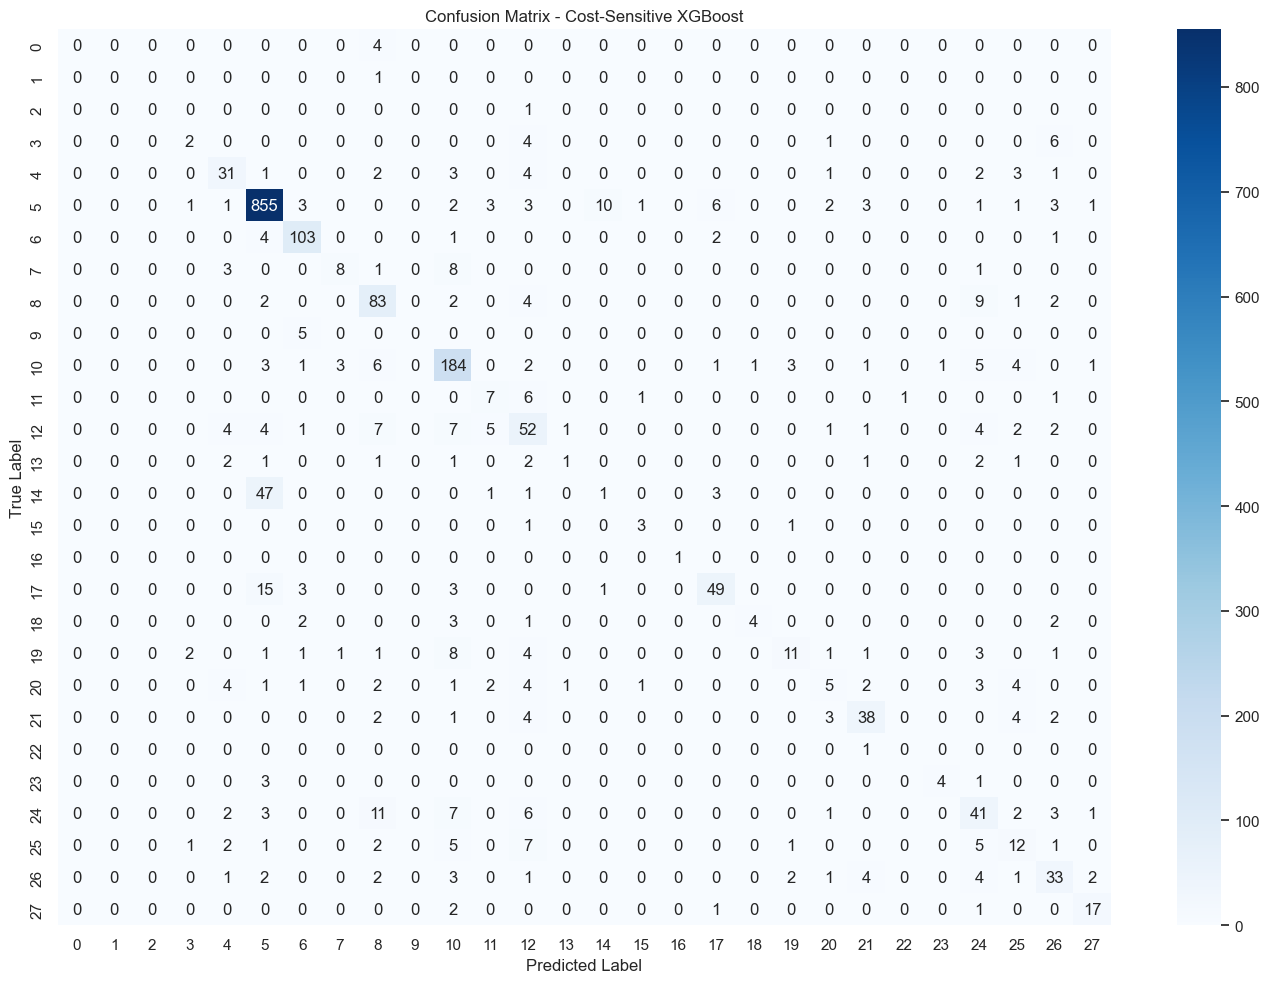

In [111]:
from sklearn.metrics import confusion_matrix

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_val_split, y_pred_val)

# 可选：标准化（按真实类别行归一化）
# conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# 绘图
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # 👈 加了 annot=True, fmt='d'
plt.title("Confusion Matrix - Cost-Sensitive XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()